In [ ]:
! pip install transformers==4.28.0
! pip install accelerate
! pip install datasets
! pip install nltk
! pip install huggingface_hub
! pip install sentencepiece
! pip install evaluate
! pip install gdown
! pip install git-lfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load Datasets

In [ ]:
from datasets import load_dataset
dataset = load_dataset("bitext/customer-support-intent-dataset")

Repo card metadata block was not found. Setting CardData to empty.


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['utterance', 'intent', 'category', 'tags'],
        num_rows: 6539
    })
    validation: Dataset({
        features: ['utterance', 'intent', 'category', 'tags'],
        num_rows: 818
    })
    test: Dataset({
        features: ['utterance', 'intent', 'category', 'tags'],
        num_rows: 818
    })
})


In [ ]:
# convert datasetdict to pandas format
train = dataset["train"].to_pandas()
validation = dataset["validation"].to_pandas()
test = dataset["test"].to_pandas()

In [ ]:
train

utterance        intent  \
0      would it be possible to cancel the order I made?  cancel_order   
1                                      cancelling order  cancel_order   
2     I need assistance canceling the last order I h...  cancel_order   
3               problem with canceling the order I made  cancel_order   
4           I don't know how to cancel the order I made  cancel_order   
...                                                 ...           ...   
6534  I do not know what I have to do to track the r...  track_refund   
6535                                check refund status  track_refund   
6536                    help me check the refund status  track_refund   
6537  how can I check if there is any updates on my ...  track_refund   
6538  how do I check if there is anything wrong with...  track_refund   

     category tags  
0       ORDER  BIP  
1       ORDER   BK  
2       ORDER    B  
3       ORDER    B  
4       ORDER    B  
...       ...  ...  
6534   REFUND   BE  
6535   REFUND   BK  
6536   REFUND    B  
6537   REFUND  BIM  
6538   REFUND   BI  

[6539 rows x 4 columns]

In [ ]:
validation

utterance        intent category  \
0          I want help to cancel the order I have made  cancel_order    ORDER   
1    where can I get information about order cancel...  cancel_order    ORDER   
2                        help to cancel the last order  cancel_order    ORDER   
3           I need help with canceling an order I made  cancel_order    ORDER   
4      I do not know how I can cancel the order I made  cancel_order    ORDER   
..                                                 ...           ...      ...   
813                   I try to check the refund status  track_refund   REFUND   
814       I want assistance to check the refund status  track_refund   REFUND   
815  I want assistance checking the status of the r...  track_refund   REFUND   
816                  how can I check my refund status?  track_refund   REFUND   
817                       where do I track the refund?  track_refund   REFUND   

    tags  
0      B  
1    BIM  
2      B  
3      B  
4     BE  
..   ...  
813    B  
814    B  
815    B  
816   BI  
817   BI  

[818 rows x 4 columns]

In [ ]:
test

utterance        intent category  \
0         I have a question about cancelling an order  cancel_order    ORDER   
1                help canceling the order I have made  cancel_order    ORDER   
2    I do not know how to cancel an order I have made  cancel_order    ORDER   
3           where can I cancel the last order I made?  cancel_order    ORDER   
4                  I don't want the last order I made  cancel_order    ORDER   
..                                                ...           ...      ...   
813      I am trying to check the status of my refund  track_refund   REFUND   
814                   help checking the refund status  track_refund   REFUND   
815                will you show me my refund status?  track_refund   REFUND   
816                          help to track the refund  track_refund   REFUND   
817                   I am trying to track the refund  track_refund   REFUND   

    tags  
0      B  
1      B  
2     BE  
3     BI  
4      B  
..   ...  
813    B  
814    B  
815  BIP  
816    B  
817    B  

[818 rows x 4 columns]

## Save to csv format

In [ ]:
train.to_csv('/content/drive/MyDrive/OMDENA DATASET/df_train.csv', index=False)

In [ ]:
validation.to_csv('/content/drive/MyDrive/OMDENA DATASET/df_validation.csv', index=False)

In [ ]:
test.to_csv('/content/drive/MyDrive/OMDENA DATASET/df_test.csv', index=False)

# Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OMDENA DATASET/df_train_augmentasi.csv')

In [ ]:
df

utterance        intent  \
0       would it be possible to cancel the order I made?  cancel_order   
1                                       cancelling order  cancel_order   
2      I need assistance canceling the last order I h...  cancel_order   
3                problem with canceling the order I made  cancel_order   
4            I don't know how to cancel the order I made  cancel_order   
...                                                  ...           ...   
13020  I do not know what I have to do to track the r...  track_refund   
13021                            verifying refund status  track_refund   
13022             help me check the reimbursement status  track_refund   
13023  how can I inspections if there is any updates ...  track_refund   
13024  how do I check if there is anything wrong with...  track_refund   

      category  
0        ORDER  
1        ORDER  
2        ORDER  
3        ORDER  
4        ORDER  
...        ...  
13020   REFUND  
13021   REFUND  
13022   REFUND  
13023   REFUND  
13024   REFUND  

[13025 rows x 3 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13025 entries, 0 to 13024
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   utterance  13025 non-null  object
 1   intent     13025 non-null  object
 2   category   13025 non-null  object
dtypes: object(3)
memory usage: 305.4+ KB


In [ ]:
df['length'] = df['utterance'].apply(lambda x: len(x.split()))

In [ ]:
df

utterance        intent  \
0       would it be possible to cancel the order I made?  cancel_order   
1                                       cancelling order  cancel_order   
2      I need assistance canceling the last order I h...  cancel_order   
3                problem with canceling the order I made  cancel_order   
4            I don't know how to cancel the order I made  cancel_order   
...                                                  ...           ...   
13020  I do not know what I have to do to track the r...  track_refund   
13021                            verifying refund status  track_refund   
13022             help me check the reimbursement status  track_refund   
13023  how can I inspections if there is any updates ...  track_refund   
13024  how do I check if there is anything wrong with...  track_refund   

      category  length  
0        ORDER      10  
1        ORDER       2  
2        ORDER      10  
3        ORDER       7  
4        ORDER      10  
...        ...     ...  
13020   REFUND      13  
13021   REFUND       3  
13022   REFUND       6  
13023   REFUND      12  
13024   REFUND      12  

[13025 rows x 4 columns]

In [ ]:
# check descriptive statistics for numeric column

df.describe(exclude='object').T

count     mean       std  min  25%  50%   75%   max
length  13025.0  8.32476  2.401248  1.0  7.0  8.0  10.0  15.0

from result we know the minimum length of utterance is 1 and the maximum length is 15

In [ ]:
df[df['length'] == 1]

utterance          intent  category  length
1750     complaint       complaint  FEEDBACK       1
2452   registering  create_account   ACCOUNT       1
2631      register  create_account   ACCOUNT       1
5336        review          review  FEEDBACK       1
8282    complaints       complaint  FEEDBACK       1
8979    recordings  create_account   ACCOUNT       1
9156          logs  create_account   ACCOUNT       1
11827      inspect          review  FEEDBACK       1

In [ ]:
df[df['length'] == 15]

utterance           intent  \
2451   I do not know what I have to do to open a new ...   create_account   
2601   i do not know what i need to do to open a new ...   create_account   
3213   I do not know how I can check how soon can I e...  delivery_period   
3948   I do not know what I have to do to get a refun...       get_refund   
3977   I do not know what I need to do to get a refun...       get_refund   
4621   I do not know what I need to do to buy some of...      place_order   
4679   I do not know what I need to do to buy several...      place_order   
4713   I don't know what I need to do to buy a few of...      place_order   
4748   I do not know what I have to do to buy several...      place_order   
5933   i do not know what i have to do to switch to m...   switch_account   
8978   I do not know what I have to do to open a new ...   create_account   
9126   i do not savoir what i need to do to open a ne...   create_account   
9733   I do not know how I can check how soon can I e...  delivery_period   
10452  I do not know what I have to do to obtains a r...       get_refund   
10481  I do not know what I need to do to obtains a r...       get_refund   
11114  I do not savoir what I need to do to buy some ...      place_order   
11172  I do not know what I need to do to acquire sev...      place_order   
11206  I don't know what I necessary to do to buy a f...      place_order   
11241  I do not know what I have to do to buy myriad ...      place_order   
12421  i do not know what i have to do to switches to...   switch_account   

       category  length  
2451    ACCOUNT      15  
2601    ACCOUNT      15  
3213   DELIVERY      15  
3948     REFUND      15  
3977     REFUND      15  
4621      ORDER      15  
4679      ORDER      15  
4713      ORDER      15  
4748      ORDER      15  
5933    ACCOUNT      15  
8978    ACCOUNT      15  
9126    ACCOUNT      15  
9733   DELIVERY      15  
10452    REFUND      15  
10481    REFUND      15  
11114     ORDER      15  
11172     ORDER      15  
11206     ORDER      15  
11241     ORDER      15  
12421   ACCOUNT      15

In [ ]:
# check descriptive statistics for categorical column

df.describe(exclude='number').T

count unique                                               top  \
utterance  13025  13025  would it be possible to cancel the order I made?   
intent     13025     27                                       get_invoice   
category   13025     11                                           ACCOUNT   

           freq  
utterance     1  
intent      529  
category   2811

from result we know the intent of get_invoice has maximum frequency and the category of ACCOUNT has the maximum frequency

In [ ]:
# check for NaN value

df.isna().sum()

utterance    0
intent       0
category     0
length       0
dtype: int64

In [ ]:
# check for duplicated value

df.duplicated(subset='utterance').sum()

0

## Category

In [ ]:
# get the 5 highest amount of data from each category

custom_order = df.category.value_counts().nlargest(5).index

In [ ]:
strong_color = '#FF5733'

In [ ]:
palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

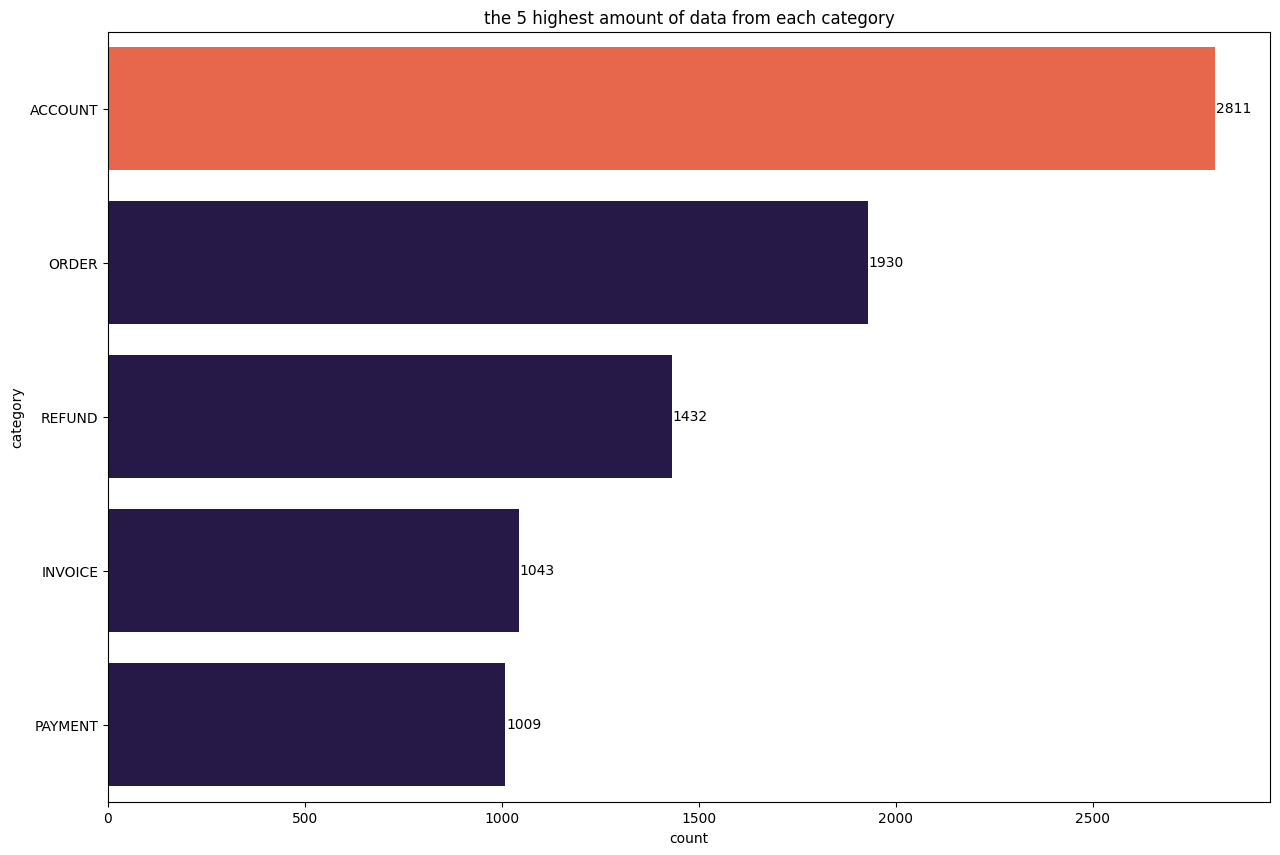

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('the 5 highest amount of data from each category')
sns.countplot(data=df, y='category', order=custom_order, palette=palette)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center', fontsize=10, color='black')

plt.show()

the account category has the highest number of data frequencies. Let's check what intents have the most frequency in the ACCOUNT category

In [ ]:
custom_order = df.intent[df['category']=='ACCOUNT'].value_counts().index

In [ ]:
strong_color = '#FF5733'

In [ ]:
palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

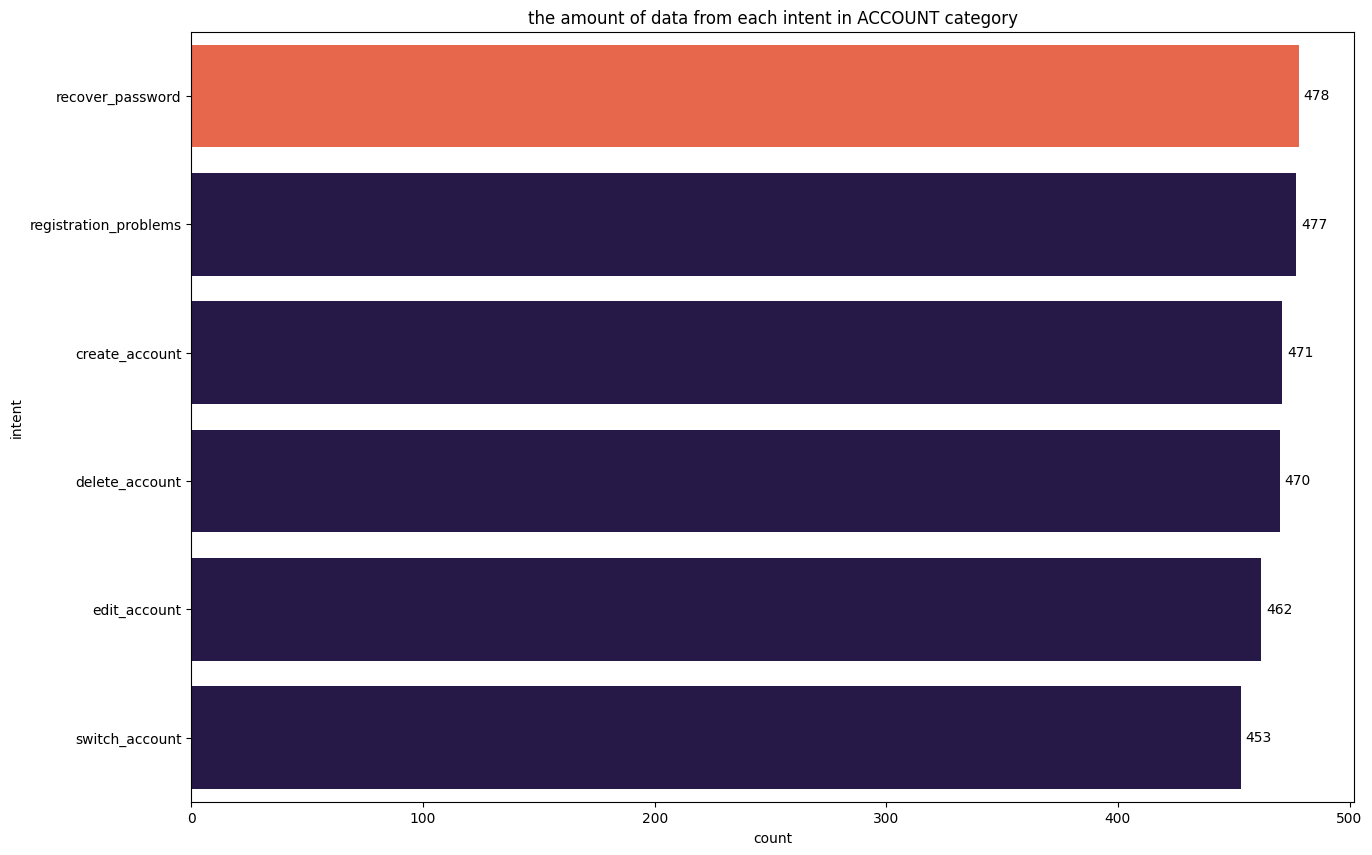

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('the amount of data from each intent in ACCOUNT category')
sns.countplot(data=df, y=df.intent[df['category']=='ACCOUNT'], order=custom_order, palette=palette)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center', fontsize=10, color='black')


plt.show()

in the category of ACCOUNT, recover_password has the most frequency

## Intent

In [ ]:
custom_order = df.intent.value_counts().index

In [ ]:
# make a df for only maximum and minimum intent count
custom_df = df[df['intent'].isin([custom_order[0], custom_order[-1]])].reset_index(drop=True)

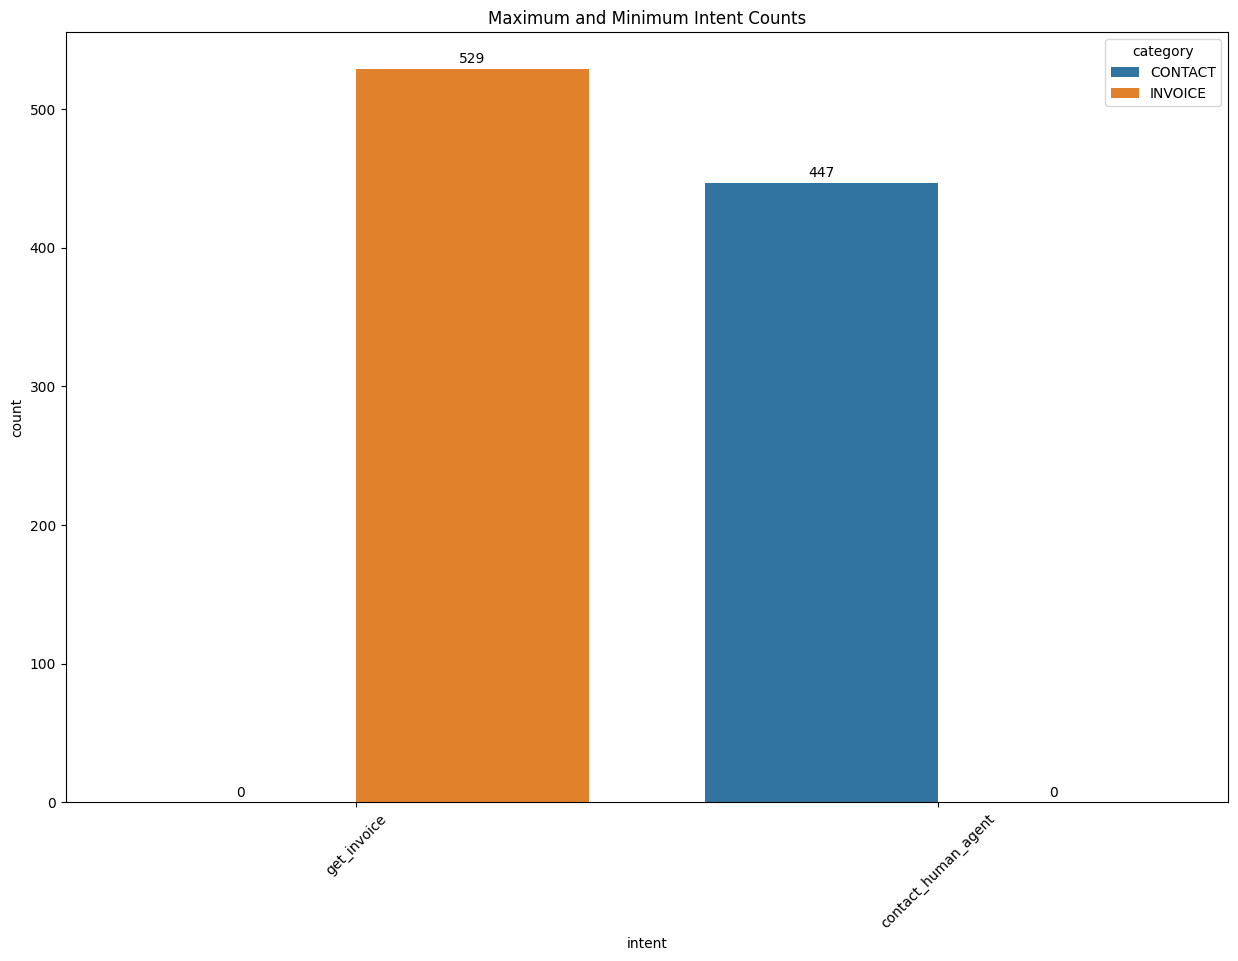

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Maximum and Minimum Intent Counts')
sns.countplot(data=custom_df, x='intent', hue='category', order=[custom_order[0], custom_order[-1]])

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, int(p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()

based on the plot, we know that the intent with the highest frequency is get_invoice and the lowest is contact_human_agent whivh belong to the category of INVOICE and CONTACT respectively

In [ ]:
for i,j in enumerate(df.intent.unique()):

  print('{}. INTENT: {} CATEGORY: {} \n'.format(i+1, j, df['category'][df.intent == j].unique()))

1. INTENT: cancel_order CATEGORY: ['ORDER'] 

2. INTENT: change_order CATEGORY: ['ORDER'] 

3. INTENT: change_shipping_address CATEGORY: ['SHIPPING_ADDRESS'] 

4. INTENT: check_cancellation_fee CATEGORY: ['CANCELLATION_FEE'] 

5. INTENT: check_invoice CATEGORY: ['INVOICE'] 

6. INTENT: check_payment_methods CATEGORY: ['PAYMENT'] 

7. INTENT: check_refund_policy CATEGORY: ['REFUND'] 

8. INTENT: complaint CATEGORY: ['FEEDBACK'] 

9. INTENT: contact_customer_service CATEGORY: ['CONTACT'] 

10. INTENT: contact_human_agent CATEGORY: ['CONTACT'] 

11. INTENT: create_account CATEGORY: ['ACCOUNT'] 

12. INTENT: delete_account CATEGORY: ['ACCOUNT'] 

13. INTENT: delivery_options CATEGORY: ['DELIVERY'] 

14. INTENT: delivery_period CATEGORY: ['DELIVERY'] 

15. INTENT: edit_account CATEGORY: ['ACCOUNT'] 

16. INTENT: get_invoice CATEGORY: ['INVOICE'] 

17. INTENT: get_refund CATEGORY: ['REFUND'] 

18. INTENT: newsletter_subscription CATEGORY: ['NEWSLETTER'] 

19. INTENT: payment_issue CATEGORY: 

## Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stpwrds = set(STOPWORDS)

In [ ]:
for i in stopwords.words('english'):

  if i not in stpwrds:
    stpwrds.update([i])

In [ ]:
wordCloud_data = df.copy()
wordCloud_data['utterance'] = wordCloud_data['utterance'].apply(lambda x: x.lower())

In [ ]:
def word_cloud(data):

  text = ' '.join([text for text in data])

  # Create stopword list:
  stopwords = set(stpwrds)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text)

  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

  text_dictionary = wordcloud.process_text(text)
  # sort the dictionary
  word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

  #use words_ to print relative word frequencies
  #rel_freq=wordcloud.words_

  #print results
  print(f'\n')
  print(f'most frequency of word:')
  print(list(word_freq.items())[:10])
  print(f'\n')
  print(f'least frequency of word:')
  print(list(word_freq.items())[-30:-1])

### ORDER

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='ORDER'].copy().reset_index(drop=True)

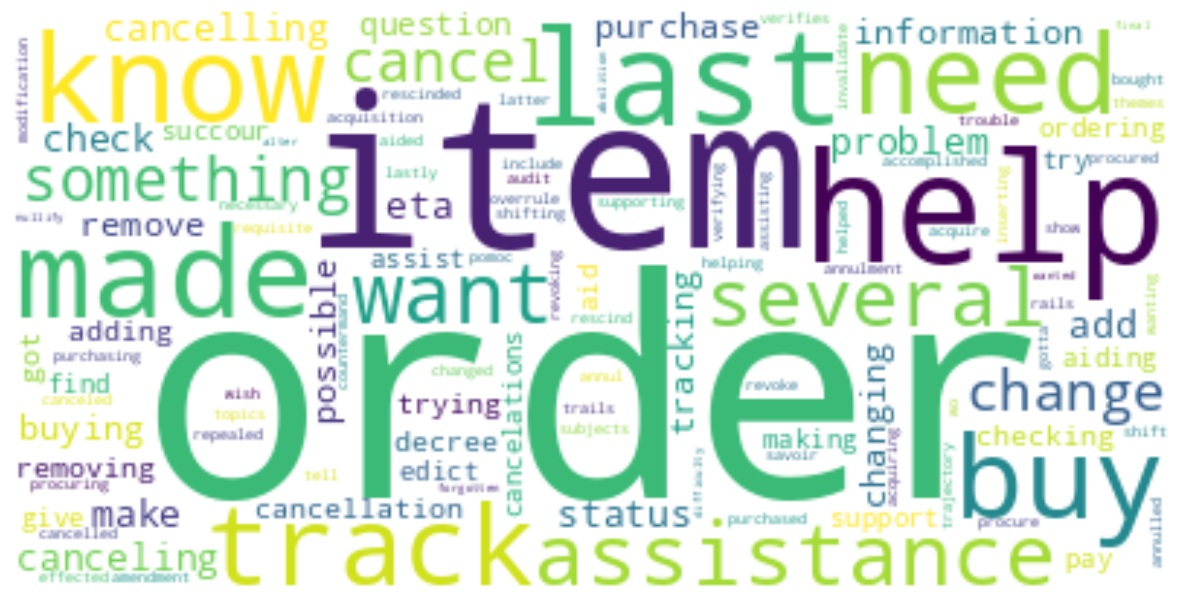



most frequency of word:
[('order', 1293), ('item', 515), ('help', 424), ('last', 331), ('made', 287), ('know', 271), ('buy', 246), ('track', 235), ('need', 233), ('assistance', 176)]


least frequency of word:
[('adjustments', 1), ('miss', 1), ('altered', 1), ('variety', 1), ('flunked', 1), ('delete', 1), ('acquired', 1), ('different', 1), ('procurement', 1), ('shopping', 1), ('assisted', 1), ('wanna', 1), ('potentially', 1), ('dissimilar', 1), ('adores', 1), ('necessity', 1), ('attainable', 1), ('strive', 1), ('exhibitions', 1), ('feasible', 1), ('probable', 1), ('significant', 1), ('seeking', 1), ('audited', 1), ('perceive', 1), ('exposition', 1), ('conceivable', 1), ('likes', 1), ('displays', 1)]


In [ ]:
word_cloud(data)

### SHIPPING ADDRESS

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='SHIPPING_ADDRESS'].copy().reset_index(drop=True)

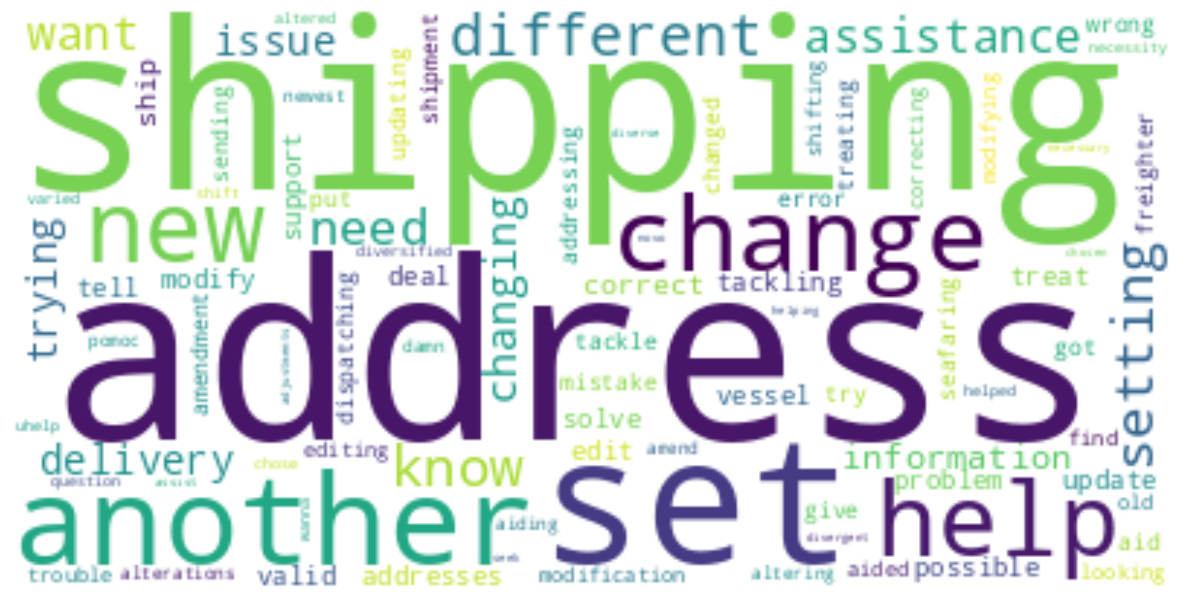



most frequency of word:
[('address', 813), ('shipping', 710), ('set', 358), ('another', 171), ('change', 170), ('help', 158), ('new', 150), ('different', 129), ('know', 119), ('setting', 116)]


least frequency of word:
[('upgraded', 1), ('rectify', 1), ('ancient', 1), ('corrected', 1), ('refreshed', 1), ('rectified', 1), ('loves', 1), ('vecchio', 1), ('tempting', 1), ('alter', 1), ('strive', 1), ('darn', 1), ('refresh', 1), ('attempts', 1), ('striving', 1), ('disparate', 1), ('newer', 1), ('tried', 1), ('wantto', 1), ('configure', 1), ('desiring', 1), ('differing', 1), ('nuevo', 1), ('attainable', 1), ('significant', 1), ('wish', 1), ('meaningful', 1), ('succour', 1), ('multiple', 1)]


In [ ]:
word_cloud(data)

### CANCELLATION FEE

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='CANCELLATION_FEE'].copy().reset_index(drop=True)

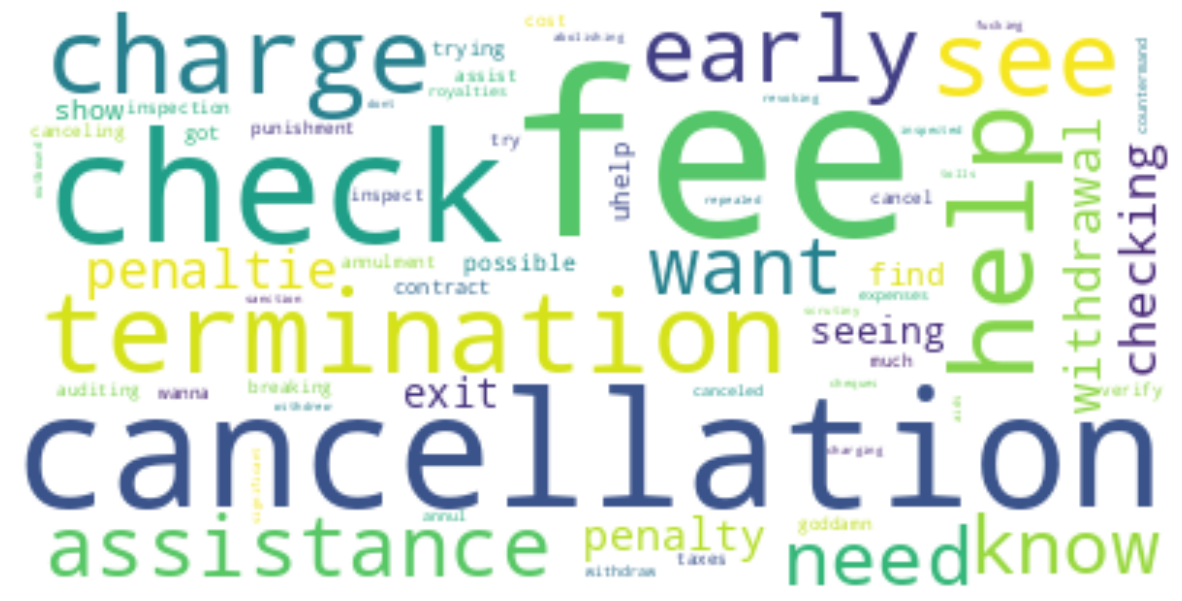



most frequency of word:
[('fee', 262), ('cancellation', 200), ('check', 195), ('help', 101), ('termination', 96), ('charge', 86), ('see', 84), ('early', 84), ('assistance', 69), ('want', 66)]


least frequency of word:
[('support', 1), ('seeks', 1), ('savoir', 1), ('wo', 1), ('withdrawn', 1), ('swift', 1), ('verifies', 1), ('breach', 1), ('unearthed', 1), ('burdens', 1), ('departing', 1), ('pomoc', 1), ('onus', 1), ('doesnt', 1), ('found', 1), ('invalidate', 1), ('checked', 1), ('fines', 1), ('fuck', 1), ('marketplace', 1), ('withdrawing', 1), ('revoke', 1), ('ending', 1), ('honorarium', 1), ('exhibited', 1), ('retraction', 1), ('required', 1), ('agreement', 1), ('terminate', 1)]


In [ ]:
word_cloud(data)

### INVOICE

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='INVOICE'].copy().reset_index(drop=True)

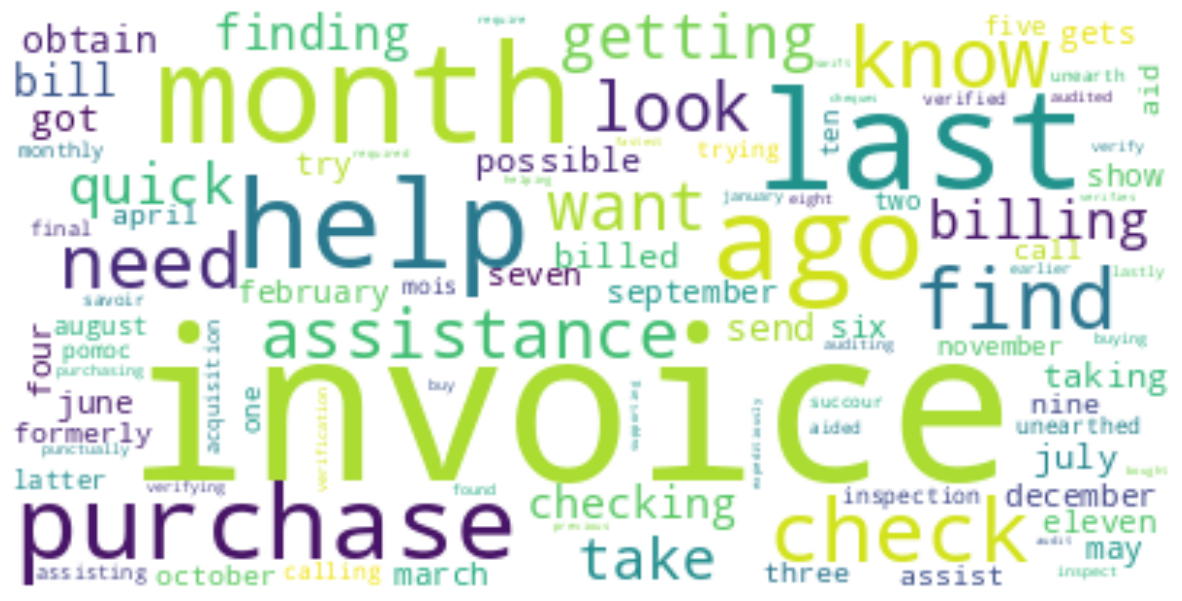



most frequency of word:
[('invoice', 937), ('month', 287), ('last', 286), ('help', 219), ('ago', 211), ('purchase', 206), ('check', 139), ('know', 134), ('find', 133), ('need', 102)]


least frequency of word:
[('conceivable', 1), ('notable', 1), ('quicker', 1), ('wanting', 1), ('demonstrating', 1), ('hurry', 1), ('support', 1), ('peek', 1), ('rapidly', 1), ('aiding', 1), ('faster', 1), ('beforehand', 1), ('adores', 1), ('shipment', 1), ('shopping', 1), ('tempting', 1), ('endeavour', 1), ('invitation', 1), ('dispatched', 1), ('helped', 1), ('marci', 1), ('necessity', 1), ('prior', 1), ('necessary', 1), ('expedition', 1), ('ai', 1), ('achievable', 1), ('strive', 1), ('sent', 1)]


In [ ]:
word_cloud(data)

### PAYMENT

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='PAYMENT'].copy().reset_index(drop=True)

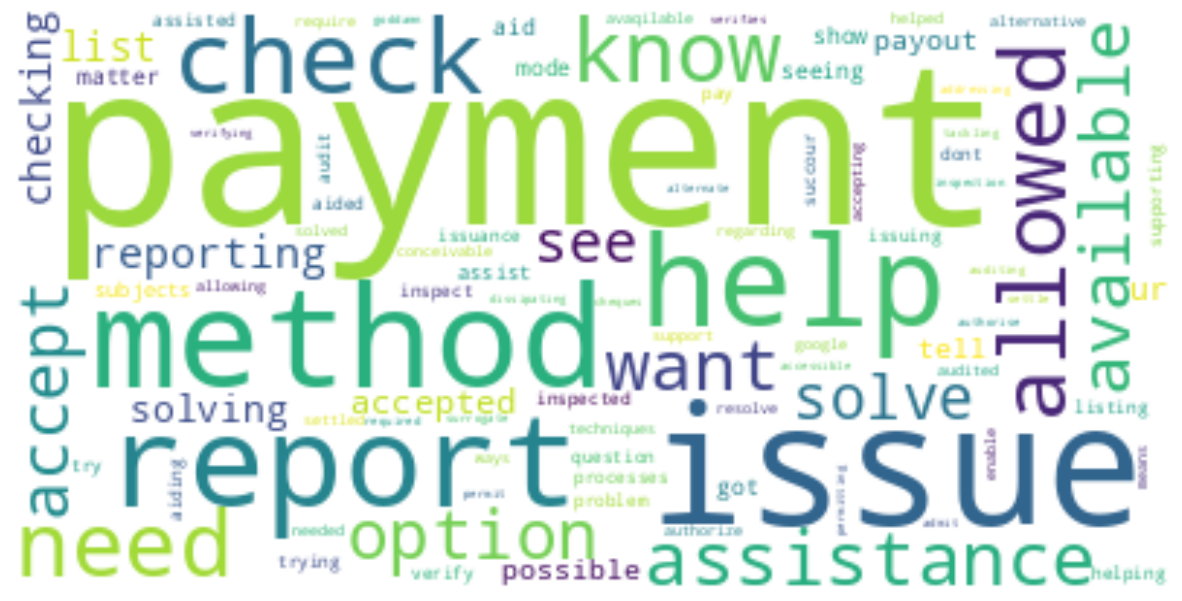



most frequency of word:
[('payment', 962), ('issue', 444), ('method', 325), ('report', 279), ('help', 269), ('check', 174), ('allowed', 129), ('need', 128), ('know', 123), ('assistance', 119)]


least frequency of word:
[('payroll', 1), ('goddammit', 1), ('acknowledge', 1), ('authorized', 1), ('told', 1), ('reachable', 1), ('couldnt', 1), ('salary', 1), ('listed', 1), ('achievable', 1), ('controlling', 1), ('exhibit', 1), ('controls', 1), ('approachable', 1), ('authorised', 1), ('authorizing', 1), ('jeez', 1), ('paid', 1), ('attempts', 1), ('potentially', 1), ('requisite', 1), ('attempted', 1), ('resolved', 1), ('address', 1), ('seek', 1), ('wanted', 1), ('endeavour', 1), ('tackle', 1), ('solution', 1)]


In [ ]:
word_cloud(data)

### REFUND

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='REFUND'].copy().reset_index(drop=True)

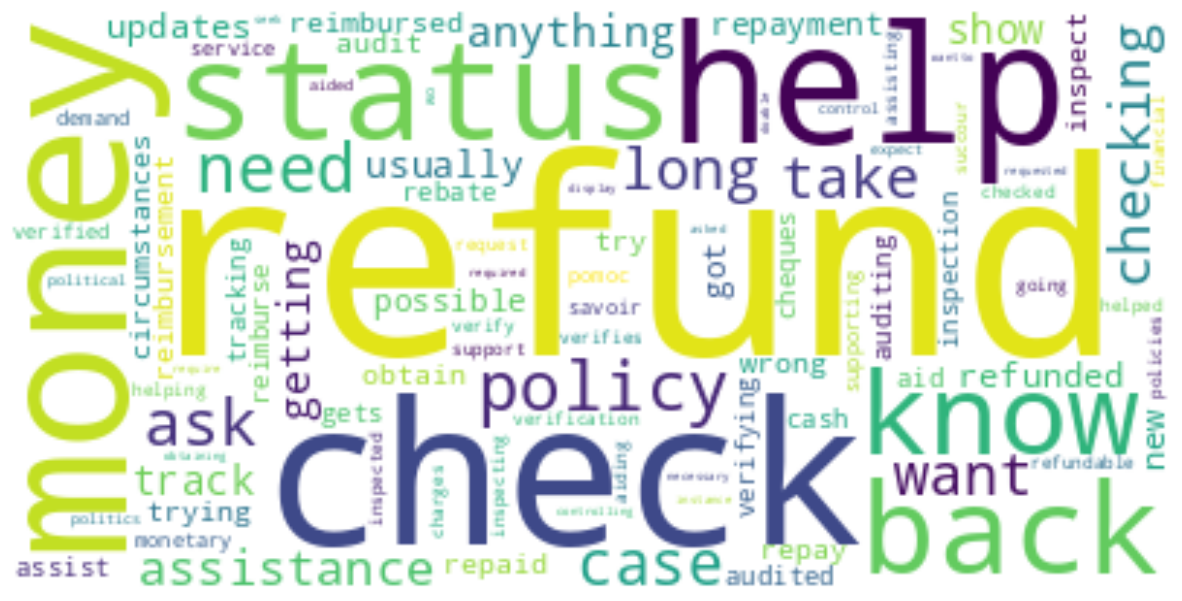



most frequency of word:
[('refund', 1008), ('check', 490), ('money', 389), ('help', 322), ('status', 275), ('back', 219), ('know', 187), ('policy', 171), ('need', 153), ('ask', 142)]


least frequency of word:
[('achievable', 1), ('desiring', 1), ('lang', 1), ('taking', 1), ('assisted', 1), ('iike', 1), ('politically', 1), ('requisite', 1), ('striving', 1), ('requesting', 1), ('awaited', 1), ('hopes', 1), ('fucking', 1), ('gonna', 1), ('needed', 1), ('adores', 1), ('novel', 1), ('nuevo', 1), ('freshen', 1), ('nada', 1), ('flawed', 1), ('nouveau', 1), ('loves', 1), ('incorrectly', 1), ('exhibit', 1), ('incorrect', 1), ('demonstrating', 1), ('refreshes', 1), ('newest', 1)]


In [ ]:
word_cloud(data)

### FEEDBACK

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='FEEDBACK'].copy().reset_index(drop=True)

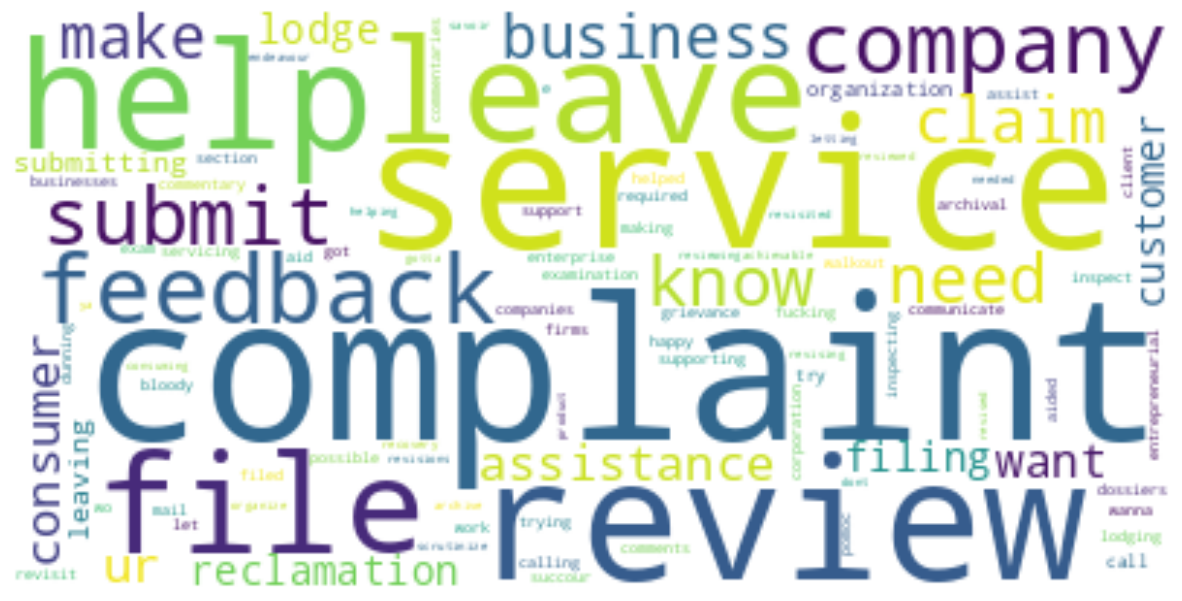



most frequency of word:
[('complaint', 290), ('service', 235), ('review', 214), ('help', 203), ('leave', 198), ('file', 180), ('feedback', 177), ('company', 162), ('submit', 157), ('know', 114)]


least frequency of word:
[('cheerful', 1), ('joyful', 1), ('wanted', 1), ('cheery', 1), ('loge', 1), ('striving', 1), ('pleased', 1), ('clientele', 1), ('corporate', 1), ('contented', 1), ('desiring', 1), ('allege', 1), ('jubilant', 1), ('deliver', 1), ('collaboration', 1), ('homicidal', 1), ('attainable', 1), ('tempting', 1), ('assisting', 1), ('presenting', 1), ('exiting', 1), ('likes', 1), ('commodities', 1), ('doable', 1), ('abandoning', 1), ('might', 1), ('aiding', 1), ('gets', 1), ('societies', 1)]


In [ ]:
word_cloud(data)

### CONTACT

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='CONTACT'].copy().reset_index(drop=True)

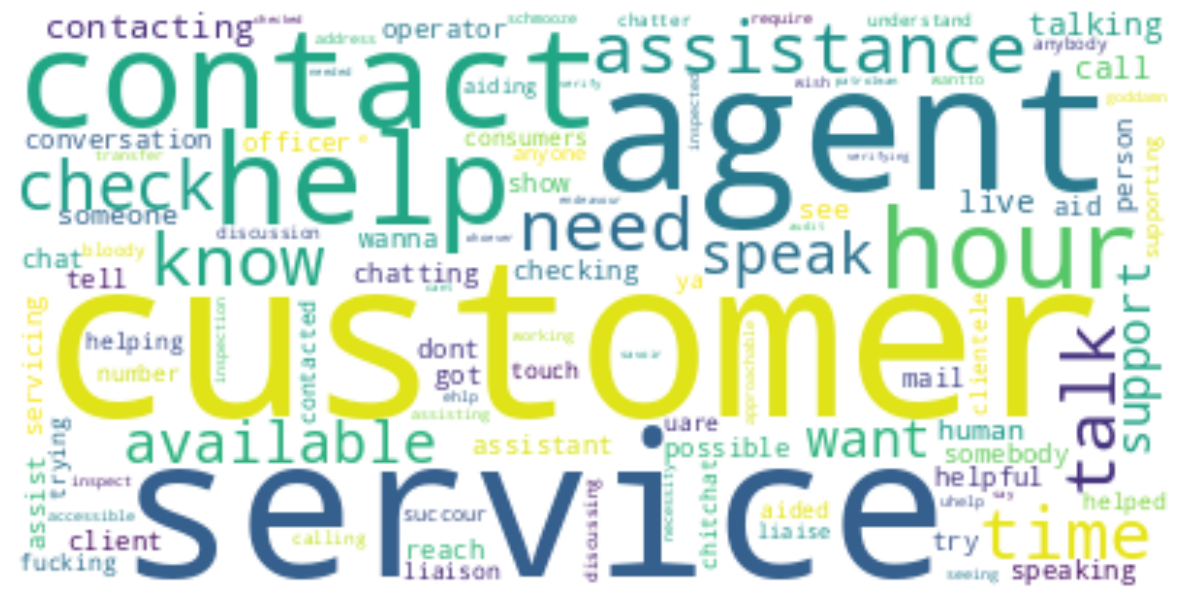



most frequency of word:
[('customer', 458), ('service', 356), ('agent', 271), ('contact', 244), ('help', 196), ('hour', 148), ('assistance', 130), ('need', 127), ('talk', 122), ('know', 119)]


least frequency of word:
[('showing', 1), ('moment', 1), ('achieving', 1), ('telephoning', 1), ('attempting', 1), ('wo', 1), ('wanted', 1), ('havent', 1), ('shouldnt', 1), ('wouldnt', 1), ('vive', 1), ('individual', 1), ('dunno', 1), ('feasible', 1), ('didnt', 1), ('whats', 1), ('humankind', 1), ('might', 1), ('vivo', 1), ('tried', 1), ('beneficial', 1), ('thats', 1), ('bloodied', 1), ('reachable', 1), ('frakking', 1), ('undersecretary', 1), ('viva', 1), ('gotta', 1), ('understood', 1)]


In [ ]:
word_cloud(data)

### ACCOUNT

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='ACCOUNT'].copy().reset_index(drop=True)

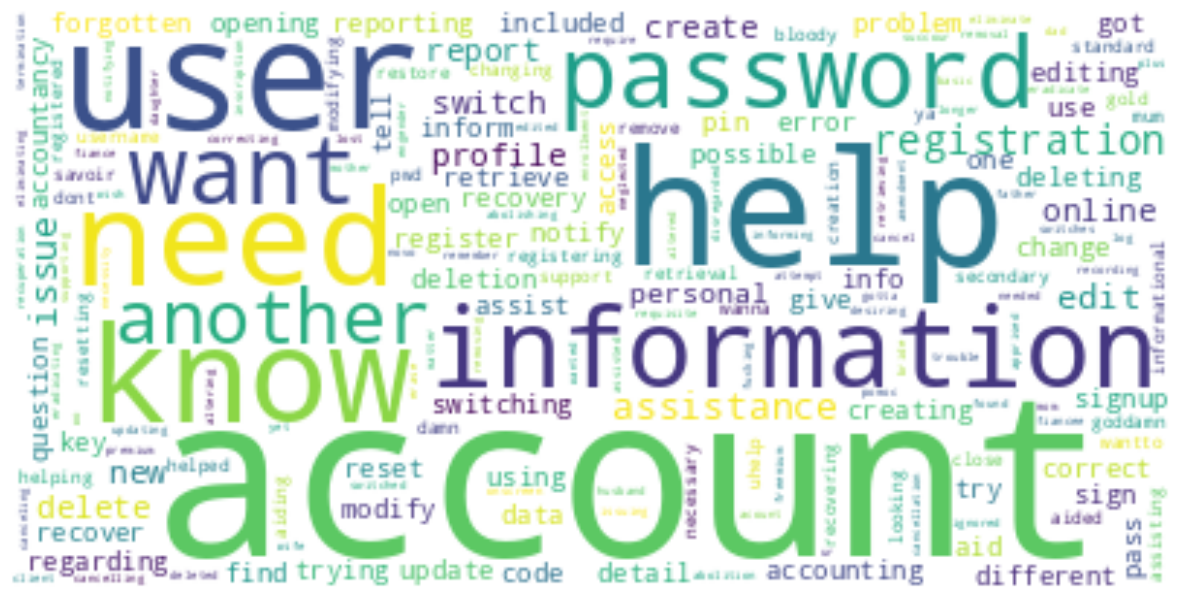



most frequency of word:
[('account', 1352), ('help', 568), ('user', 510), ('need', 399), ('know', 398), ('information', 365), ('password', 286), ('want', 274), ('another', 271), ('registration', 265)]


least frequency of word:
[('restarted', 1), ('damned', 1), ('reboot', 1), ('say', 1), ('obtains', 1), ('repossess', 1), ('accessed', 1), ('difficulty', 1), ('adores', 1), ('rehabilitating', 1), ('convalescence', 1), ('told', 1), ('pivotal', 1), ('briefed', 1), ('blunders', 1), ('pertaining', 1), ('hassle', 1), ('cursed', 1), ('enlightened', 1), ('seeking', 1), ('becuase', 1), ('notified', 1), ('tried', 1), ('dissimilar', 1), ('divergent', 1), ('changed', 1), ('thats', 1), ('significant', 1), ('long', 1)]


In [ ]:
word_cloud(data)

### DELIVERY

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='DELIVERY'].copy().reset_index(drop=True)

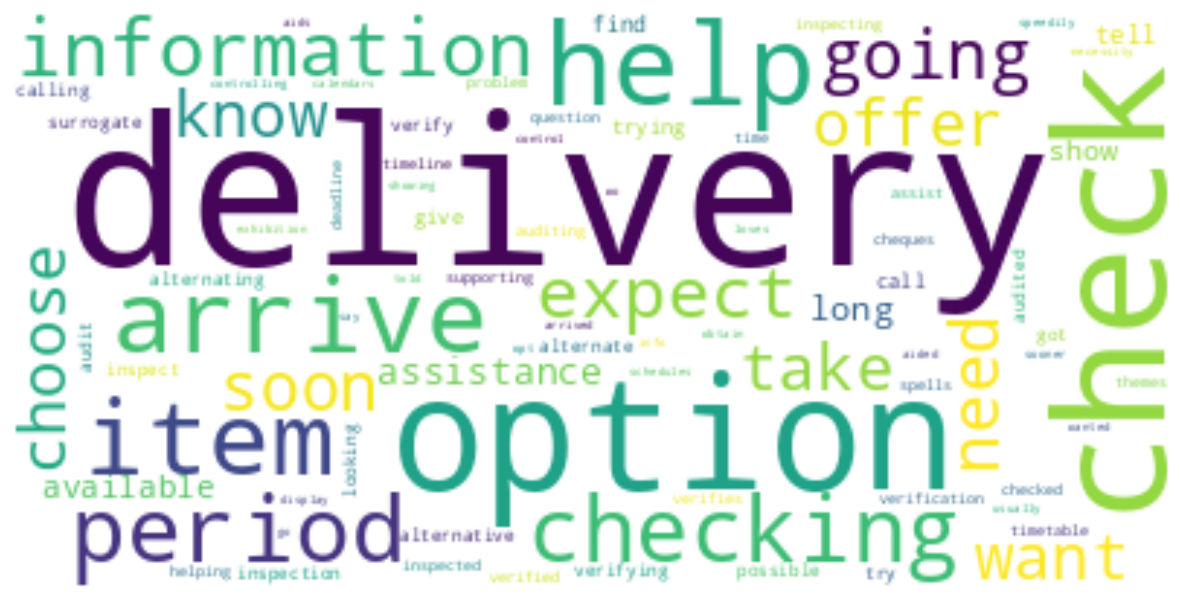



most frequency of word:
[('delivery', 775), ('option', 408), ('check', 394), ('help', 179), ('item', 155), ('arrive', 152), ('period', 115), ('checking', 110), ('information', 107), ('expect', 93)]


least frequency of word:
[('illustrating', 1), ('quick', 1), ('wish', 1), ('attempt', 1), ('swift', 1), ('shortly', 1), ('rapidly', 1), ('feasible', 1), ('wanting', 1), ('strive', 1), ('doable', 1), ('savoir', 1), ('waits', 1), ('longue', 1), ('subjects', 1), ('researching', 1), ('tries', 1), ('lang', 1), ('lengthy', 1), ('expeditiously', 1), ('lange', 1), ('gotta', 1), ('early', 1), ('quickly', 1), ('longer', 1), ('promptly', 1), ('striving', 1), ('traditionally', 1), ('protracted', 1)]


In [ ]:
word_cloud(data)

### NEWSLETTER

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='NEWSLETTER'].copy().reset_index(drop=True)

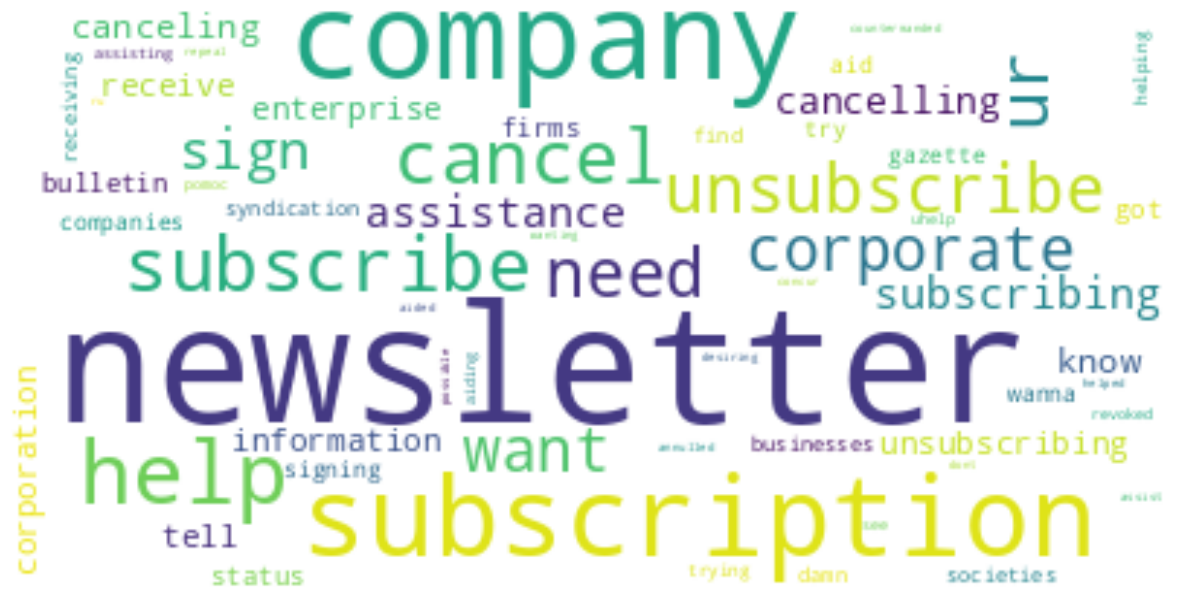



most frequency of word:
[('newsletter', 448), ('company', 229), ('subscription', 189), ('help', 113), ('cancel', 81), ('subscribe', 80), ('unsubscribe', 60), ('ur', 59), ('need', 57), ('corporate', 48)]


least frequency of word:
[('check', 1), ('goddamn', 1), ('gotta', 1), ('assisted', 1), ('goddam', 1), ('annulment', 1), ('required', 1), ('signature', 1), ('displaying', 1), ('attempt', 1), ('require', 1), ('rescinded', 1), ('inspecting', 1), ('doesnt', 1), ('wish', 1), ('abolish', 1), ('doable', 1), ('firma', 1), ('fucking', 1), ('fuckin', 1), ('endeavour', 1), ('potentially', 1), ('nullify', 1), ('savoir', 1), ('achievable', 1), ('countermand', 1), ('cancellations', 1), ('invalidate', 1), ('annul', 1)]


In [ ]:
word_cloud(data)

### statistical test between intent and category

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


chi2_check = {}


prob = 0.95
chi, p, dof, ex = chi2_contingency(pd.crosstab(df['category'], df['intent']))
chi2_check.setdefault('Feature',[]).append('category')
chi2_check.setdefault('chi',[]).append(chi)
chi2_check.setdefault('critical 0.05',[]).append(chi2.ppf(prob, dof))
chi2_check.setdefault('p-value',[]).append(round(p, 10))
chi2_check.setdefault('alpha',[]).append('0.05')

chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

Feature       chi  critical 0.05  p-value alpha
0  category  130250.0     298.610588      0.0  0.05



*   If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
*   If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

*   If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
*   If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

Based on the Chi2 test, it can be seen that the category variable has a significant influence on the target intent variable. We can use the category variable to use in modeling if needed.

# Preprocessing

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 19.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import math
import string
import unicodedata

from nltk.stem import PorterStemmer
import contractions

from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
contraction = {key.lower(): value.lower() for key, value in contractions.contractions_dict.items()}

In [ ]:
class Prepro(BaseEstimator, TransformerMixin):

    def normalize(self, text):
        text = text.lower()
        text = text.split()

        for idx, word in enumerate(text):

          if word in list(contraction.keys()):
            text[idx] = contraction[word]

        return ' '.join(text)

    def cleansing(self, text):

        text = re.sub(r"\s+", " ", text, flags=re.UNICODE)
        text = re.sub(r'[0-9]', '', text) # number
        text = (unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode("ascii"))
        text = re.sub(r'[\!\"\”\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\[\\\]\^\_\`\{\|\}\~\–]', '', text) #punctuation
        text = re.sub(r' +', ' ', text)
        text = text.strip()

        return text.lower()

    def stopwords(self, text):

        text = text.split()

        text = [word for word in text if word not in stpwrds]

        return ' '.join(text)

    def stemming(self, text):

        text = text.split()
        stemmer = PorterStemmer()

        return ' '.join([stemmer.stem(word) for word in text])

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        X_copy = X.copy()  # Make a copy to avoid modifying the original DataFrame
        X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.normalize(x))
        X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.cleansing(x))
        X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.stopwords(x))
        X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.stemming(x))

        return X_copy

In [ ]:
train_df = df.copy()
valid_df = pd.read_csv('/content/drive/MyDrive/OMDENA DATASET/df_validation.csv')

In [ ]:
preprocessor = Prepro()

In [ ]:
train_df = preprocessor.fit_transform(train_df)

In [ ]:
valid_df = preprocessor.transform(valid_df)

In [ ]:
train_df

utterance        intent category  length
0               possibl cancel order made  cancel_order    ORDER      10
1                            cancel order  cancel_order    ORDER       2
2      need assist cancel last order made  cancel_order    ORDER      10
3               problem cancel order made  cancel_order    ORDER       7
4                  know cancel order made  cancel_order    ORDER      10
...                                   ...           ...      ...     ...
13020                 know track reimburs  track_refund   REFUND      13
13021                 verifi refund statu  track_refund   REFUND       3
13022           help check reimburs statu  track_refund   REFUND       6
13023                inspect updat refund  track_refund   REFUND      12
13024             check anyth wrong rebat  track_refund   REFUND      12

[13025 rows x 4 columns]

In [ ]:
valid_df

utterance        intent category tags
0       want help cancel order made  cancel_order    ORDER    B
1               inform order cancel  cancel_order    ORDER  BIM
2            help cancel last order  cancel_order    ORDER    B
3       need help cancel order made  cancel_order    ORDER    B
4            know cancel order made  cancel_order    ORDER   BE
..                              ...           ...      ...  ...
813          tri check refund statu  track_refund   REFUND    B
814  want assist check refund statu  track_refund   REFUND    B
815  want assist check statu refund  track_refund   REFUND    B
816              check refund statu  track_refund   REFUND   BI
817                    track refund  track_refund   REFUND   BI

[818 rows x 4 columns]

In [ ]:
from sklearn.model_selection import train_test_split

train_df, valid_df_new = train_test_split(train_df, test_size=0.2, stratify=train_df.intent, random_state=42)

In [ ]:
train_df = train_df.reset_index(drop=True)
valid_df_new = valid_df_new.reset_index(drop=True)

In [ ]:
valid_df = pd.concat([valid_df, valid_df_new], ignore_index=True, sort=False)

In [ ]:
valid_df.isna().sum()

utterance       0
intent          0
category        0
tags         2605
length        818
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['intent'] = le.fit_transform(train_df['intent'])
valid_df['intent'] = le.transform(valid_df['intent'])

In [ ]:
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True) #shuffle df

In [ ]:
valid_df = valid_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'cancel_order': 0, 'change_order': 1, 'change_shipping_address': 2, 'check_cancellation_fee': 3, 'check_invoice': 4, 'check_payment_methods': 5, 'check_refund_policy': 6, 'complaint': 7, 'contact_customer_service': 8, 'contact_human_agent': 9, 'create_account': 10, 'delete_account': 11, 'delivery_options': 12, 'delivery_period': 13, 'edit_account': 14, 'get_invoice': 15, 'get_refund': 16, 'newsletter_subscription': 17, 'payment_issue': 18, 'place_order': 19, 'recover_password': 20, 'registration_problems': 21, 'review': 22, 'set_up_shipping_address': 23, 'switch_account': 24, 'track_order': 25, 'track_refund': 26}


In [ ]:
re = {v:k for k,v in dictionary.items()}
print(re)

{0: 'cancel_order', 1: 'change_order', 2: 'change_shipping_address', 3: 'check_cancellation_fee', 4: 'check_invoice', 5: 'check_payment_methods', 6: 'check_refund_policy', 7: 'complaint', 8: 'contact_customer_service', 9: 'contact_human_agent', 10: 'create_account', 11: 'delete_account', 12: 'delivery_options', 13: 'delivery_period', 14: 'edit_account', 15: 'get_invoice', 16: 'get_refund', 17: 'newsletter_subscription', 18: 'payment_issue', 19: 'place_order', 20: 'recover_password', 21: 'registration_problems', 22: 'review', 23: 'set_up_shipping_address', 24: 'switch_account', 25: 'track_order', 26: 'track_refund'}


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
train = train_df.rename(columns={'utterance': 'text', 'intent': 'label'})

In [ ]:
valid = valid_df.rename(columns={'utterance': 'text', 'intent': 'label'})

In [ ]:
train = train.drop(columns=['category', 'length'])
valid = valid.drop(columns=['category', 'tags', 'length'])

In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_dict(train)
valid_dataset = Dataset.from_dict(valid)

In [ ]:
import datasets
dd = datasets.DatasetDict({"train":train_dataset,"validation":valid_dataset})

# Modeling

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding='max_length')

In [ ]:
tokenized_datasets = dd.map(tokenize_function, batched=True)

Map:   0%|          | 0/10420 [00:00<?, ? examples/s]

Map:   0%|          | 0/3423 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_datasets['train'][0])

{'text': 'know necess invoic', 'label': 15, 'input_ids': [101, 2113, 26785, 7971, 1999, 6767, 2594, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 10420
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 3423
    })
})

In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(
    'text'
)

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
data_collator(tokenized_datasets["train"][0])

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'input_ids': tensor([  101,  2113, 26785,  7971,  1999,  6767,  2594,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 

In [ ]:
import evaluate
import numpy as np

def compute_metrics(eval_pred):
    metric1 = evaluate.load("accuracy")
    metric2 = evaluate.load("precision")
    metric3 = evaluate.load("recall")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric1.compute(predictions=predictions, references=labels)['accuracy']
    precision = metric2.compute(predictions=predictions, references=labels, average='macro')["precision"]
    recall = metric3.compute(predictions=predictions, references=labels, average='macro')["recall"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall}

In [ ]:
id2label = {0: 'cancel_order', 1: 'change_order', 2: 'change_shipping_address', 3: 'check_cancellation_fee', 4: 'check_invoice', 5: 'check_payment_methods', 6: 'check_refund_policy', 7: 'complaint', 8: 'contact_customer_service', 9: 'contact_human_agent', 10: 'create_account', 11: 'delete_account', 12: 'delivery_options', 13: 'delivery_period', 14: 'edit_account', 15: 'get_invoice', 16: 'get_refund', 17: 'newsletter_subscription', 18: 'payment_issue', 19: 'place_order', 20: 'recover_password', 21: 'registration_problems', 22: 'review', 23: 'set_up_shipping_address', 24: 'switch_account', 25: 'track_order', 26: 'track_refund'}
label2id = {'cancel_order': 0, 'change_order': 1, 'change_shipping_address': 2, 'check_cancellation_fee': 3, 'check_invoice': 4, 'check_payment_methods': 5, 'check_refund_policy': 6, 'complaint': 7, 'contact_customer_service': 8, 'contact_human_agent': 9, 'create_account': 10, 'delete_account': 11, 'delivery_options': 12, 'delivery_period': 13, 'edit_account': 14, 'get_invoice': 15, 'get_refund': 16, 'newsletter_subscription': 17, 'payment_issue': 18, 'place_order': 19, 'recover_password': 20, 'registration_problems': 21, 'review': 22, 'set_up_shipping_address': 23, 'switch_account': 24, 'track_order': 25, 'track_refund': 26}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=27, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifi

In [ ]:
from transformers import TrainerCallback, TrainerControl

class LossEqualityCallback(TrainerCallback):

    def __init__(self, max_loss_diff=0.005):
        self.max_loss_diff = max_loss_diff

    # try to stop the training process in a non-overfit condition
    def on_log(self, args, state, control, val={}, **kwargs):

        if 'logs' in kwargs:

          if 'loss' in kwargs['logs']:
            val.setdefault('loss', []).append(kwargs['logs']['loss'])
          elif 'eval_loss' in kwargs['logs']:
            val.setdefault('eval_loss', []).append(kwargs['logs']['eval_loss'])

        if 'loss' in val and 'eval_loss' in val:

          if len(val['loss']) == len(val['eval_loss']):
            if val['loss'][-1] < val['eval_loss'][-1] and abs(val['loss'][-1] - val['eval_loss'][-1]) > self.max_loss_diff:

              control.should_training_stop = True
              print('TRAINING STOP')
              print(f'val: {val}')
              print(state.log_history)

In [ ]:
custom_callback = LossEqualityCallback()

In [ ]:
batch_size = 32
num_train_epochs = 10
logging_steps = len(tokenized_datasets["train"]) // batch_size

training_args = TrainingArguments(
    output_dir='distilbert-base-uncased-OMDENA-cllbck-augmentation',
    learning_rate=2e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_train_epochs,
    weight_decay=0.0001,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
    logging_steps=logging_steps
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[custom_callback]
)

Cloning https://huggingface.co/GhifSmile/distilbert-base-uncased-OMDENA-cllbck-augmentation into local empty directory.


In [ ]:
trainer.train()

TRAINING STOP
val: {'loss': [0.3742, 0.0442, 0.0207], 'eval_loss': [0.06179513409733772, 0.03726639971137047, 0.038406968116760254]}
[{'loss': 0.3742, 'learning_rate': 0.00018006134969325154, 'epoch': 1.0, 'step': 325}, {'eval_loss': 0.06179513409733772, 'eval_accuracy': 0.9851007887817704, 'eval_precision': 0.9860448649116825, 'eval_recall': 0.9850601777122518, 'eval_runtime': 69.5378, 'eval_samples_per_second': 49.225, 'eval_steps_per_second': 1.539, 'epoch': 1.0, 'step': 326}, {'loss': 0.0442, 'learning_rate': 0.0001601226993865031, 'epoch': 1.99, 'step': 650}, {'eval_loss': 0.03726639971137047, 'eval_accuracy': 0.9909436167104879, 'eval_precision': 0.9914362691166088, 'eval_recall': 0.9909040278236582, 'eval_runtime': 67.3356, 'eval_samples_per_second': 50.835, 'eval_steps_per_second': 1.589, 'epoch': 2.0, 'step': 652}, {'loss': 0.0207, 'learning_rate': 0.0001401840490797546, 'epoch': 2.99, 'step': 975}, {'eval_loss': 0.038406968116760254, 'eval_accuracy': 0.9909436167104879, 'eval

TrainOutput(global_step=978, training_loss=0.14593170416981346, metrics={'train_runtime': 1736.1045, 'train_samples_per_second': 60.019, 'train_steps_per_second': 1.878, 'total_flos': 4142777072578560.0, 'train_loss': 0.14593170416981346, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.03726639971137047,
 'eval_accuracy': 0.9909436167104879,
 'eval_precision': 0.9914362691166088,
 'eval_recall': 0.9909040278236582,
 'eval_runtime': 68.6273,
 'eval_samples_per_second': 49.878,
 'eval_steps_per_second': 1.559,
 'epoch': 3.0}

In [ ]:
trainer.push_to_hub()

Upload file runs/Aug19_08-31-58_b9f74337e561/events.out.tfevents.1692433942.b9f74337e561.903.0:   0%|         …

Upload file runs/Aug19_08-31-58_b9f74337e561/events.out.tfevents.1692435798.b9f74337e561.903.2:   0%|         …

To https://huggingface.co/GhifSmile/distilbert-base-uncased-OMDENA-cllbck-augmentation
   e78872f..a06170f  main -> main

   e78872f..a06170f  main -> main

To https://huggingface.co/GhifSmile/distilbert-base-uncased-OMDENA-cllbck-augmentation
   a06170f..574dd2a  main -> main

   a06170f..574dd2a  main -> main



'https://huggingface.co/GhifSmile/distilbert-base-uncased-OMDENA-cllbck-augmentation/commit/a06170f0ee4faccabaa80b077ba66473ff91c88e'

In [ ]:
trainer.save_model("/content/drive/MyDrive/intent-classification-OMDENA-cllbck-augmentation")

In [ ]:
trainer.state.log_history[:-2]

[{'loss': 0.3742,
  'learning_rate': 0.00018006134969325154,
  'epoch': 1.0,
  'step': 325},
 {'eval_loss': 0.06179513409733772,
  'eval_accuracy': 0.9851007887817704,
  'eval_precision': 0.9860448649116825,
  'eval_recall': 0.9850601777122518,
  'eval_runtime': 69.5378,
  'eval_samples_per_second': 49.225,
  'eval_steps_per_second': 1.539,
  'epoch': 1.0,
  'step': 326},
 {'loss': 0.0442,
  'learning_rate': 0.0001601226993865031,
  'epoch': 1.99,
  'step': 650},
 {'eval_loss': 0.03726639971137047,
  'eval_accuracy': 0.9909436167104879,
  'eval_precision': 0.9914362691166088,
  'eval_recall': 0.9909040278236582,
  'eval_runtime': 67.3356,
  'eval_samples_per_second': 50.835,
  'eval_steps_per_second': 1.589,
  'epoch': 2.0,
  'step': 652},
 {'loss': 0.0207,
  'learning_rate': 0.0001401840490797546,
  'epoch': 2.99,
  'step': 975},
 {'eval_loss': 0.038406968116760254,
  'eval_accuracy': 0.9909436167104879,
  'eval_precision': 0.9910569459637272,
  'eval_recall': 0.9910416059026731,
  'e

In [ ]:
loss = []
val_loss = []
epoch = []

for i in trainer.state.log_history[:-2]:

  if 'loss' in i:
    loss.append(i['loss'])
  elif 'eval_loss' in i:
    val_loss.append(i['eval_loss'])

for j in trainer.state.log_history[:-2]:

  if 'epoch' in j:
    epoch.append(round(j['epoch']))

epoch = list(set(epoch))

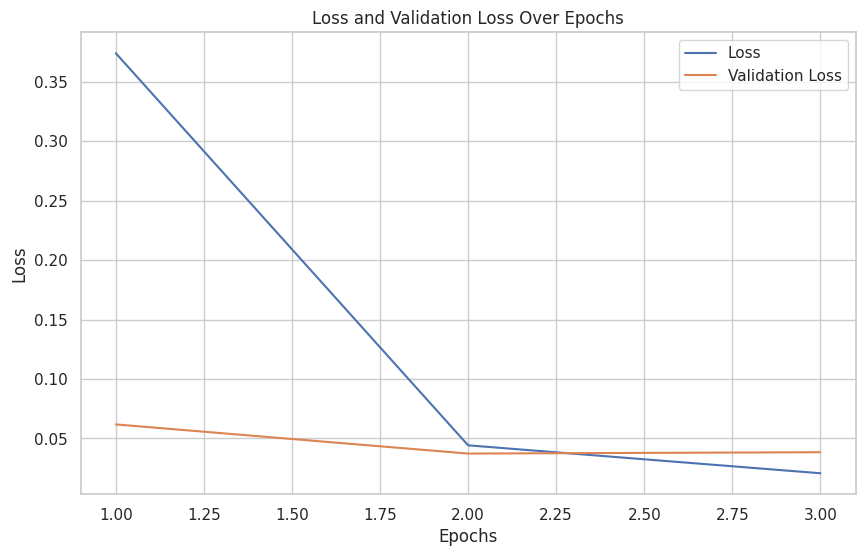

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({'Epochs': epoch, 'Loss': loss, 'Validation Loss': val_loss})

# Create a line plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot
plot = sns.lineplot(data=data, x='Epochs', y='Loss', label='Loss')
plot = sns.lineplot(data=data, x='Epochs', y='Validation Loss', label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss Over Epochs')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Inference

In [ ]:
!pip install contractions

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import unicodedata

import nltk
from nltk.stem import PorterStemmer
import contractions

from sklearn.base import BaseEstimator, TransformerMixin

from wordcloud import STOPWORDS
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
contraction = {key.lower(): value.lower() for key, value in contractions.contractions_dict.items()}

In [ ]:
stpwrds = set(STOPWORDS)

In [ ]:
for i in stopwords.words('english'):

  if i not in stpwrds:
    stpwrds.update([i])

In [ ]:
class Prepro(BaseEstimator, TransformerMixin):

    def normalize(self, text):
        text = text.lower()
        text = text.split()

        for idx, word in enumerate(text):

          if word in list(contraction.keys()):
            text[idx] = contraction[word]

        return ' '.join(text)

    def cleansing(self, text):

        text = re.sub(r"\s+", " ", text, flags=re.UNICODE)
        text = re.sub(r'[0-9]', '', text) # number
        text = (unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode("ascii"))
        text = re.sub(r'[\!\"\”\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\[\\\]\^\_\`\{\|\}\~\–]', '', text) #punctuation
        text = re.sub(r' +', ' ', text)
        text = text.strip()

        return text.lower()

    def stopwords(self, text):

        text = text.split()

        text = [word for word in text if word not in stpwrds]

        return ' '.join(text)

    def stemming(self, text):

        text = text.split()
        stemmer = PorterStemmer()

        return ' '.join([stemmer.stem(word) for word in text])

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        X = self.normalize(X)
        X = self.cleansing(X)
        X = self.stopwords(X)
        X = self.stemming(X)

        return X

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/intent-classification-OMDENA-cllbck-augmentation")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/intent-classification-OMDENA-cllbck-augmentation")

In [ ]:
id2label = {0: 'cancel_order', 1: 'change_order', 2: 'change_shipping_address', 3: 'check_cancellation_fee', 4: 'check_invoice', 5: 'check_payment_methods', 6: 'check_refund_policy', 7: 'complaint', 8: 'contact_customer_service', 9: 'contact_human_agent', 10: 'create_account', 11: 'delete_account', 12: 'delivery_options', 13: 'delivery_period', 14: 'edit_account', 15: 'get_invoice', 16: 'get_refund', 17: 'newsletter_subscription', 18: 'payment_issue', 19: 'place_order', 20: 'recover_password', 21: 'registration_problems', 22: 'review', 23: 'set_up_shipping_address', 24: 'switch_account', 25: 'track_order', 26: 'track_refund'}

In [ ]:
def inference(text, id2label=id2label):
  preprocessing = Prepro()

  for idx, sentence in enumerate(text):

    sentence = preprocessing.fit_transform(sentence)

    encoding = tokenizer(sentence, return_tensors="pt")
    outputs = model(**encoding)
    predictions = int(outputs.logits.argmax(-1))

    text[idx] = id2label[predictions]

  return text

In [ ]:
text = ["i want to change my shipping address","help for create account", "can you change the number i have?", "sorry your service is so bad", "how to get back my money"]

In [ ]:
inference(text)

['change_shipping_address',
 'create_account',
 'change_order',
 'contact_customer_service',
 'get_refund']

# Hyperparameter Tuning

In [ ]:
! pip install ray[tune]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.1 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoConfig

In [ ]:
db_config_base = AutoConfig.from_pretrained("distilbert-base-uncased")

In [ ]:
db_config_base

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.28.0",
  "vocab_size": 30522
}

In [ ]:
from ray import tune

def model_init(params):
        db_config = db_config_base
        if params is not None:
            db_config.update({'dropout': params['dropout'],'num_labels':43, 'id2label':id2label, 'label2id':label2id})
        return AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", config=db_config)

def hp_space_ray(trial):
    return {
        "learning_rate": tune.choice([2e-5, 2e-4, 2e-3]),
        "per_device_train_batch_size": tune.choice([8, 16, 24, 32]),
        "per_device_eval_batch_size":tune.choice([8, 16, 24, 32]),
        "weight_decay": tune.choice([1e-4, 1e-3, 1e-2]),
        "dropout" : tune.choice([0.1, 0.2, 0.3, 0.4])
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='distilbert-base-uncased-OMDENA-cllbck-augmentation',
    evaluation_strategy='epoch',
    eval_steps=500,
    gradient_accumulation_steps=1000,
    eval_accumulation_steps=1
)

In [ ]:
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

In [ ]:
best_trial = trainer.hyperparameter_search(
    hp_space=hp_space_ray,
    direction="maximize",
    backend="ray",
    n_trials=7)

2023-08-18 20:08:22,772	INFO worker.py:1621 -- Started a local Ray instance.
2023-08-18 20:08:27,943	INFO tune.py:226 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2023-08-18 20:08:27,977	INFO tune.py:666 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949
/usr/local/lib/python3.10/dist-packages/ray/tune/trainable/function_trainable.py:624: DeprecationWarning: `checkpoint_dir` in `func(config, checkpoint_dir)` is being deprecated. To save and load checkpoint in trainable functions, please use the `ray.air.session` API:

from ray.air import session

def train(config):
    # ...
    session.report({"metric": metric}, checkpoint=checkpoint)

For more information please see https://docs.ray.io/en/latest/tun

+-------------------------------------------------------------------+
| Configuration for experiment     _objective_2023-08-18_20-08-27   |
+-------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator            |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 7                                |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_objective_2023-08-18_20-08-27
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_objective_2023-08-18_20-08-27`

Trial status: 7 PENDING
Current time: 2023-08-18 20:08:28. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/1 GPUs
+------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status       learning_r

(pid=4096) 2023-08-18 20:08:35.335842: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Trial _objective_fec0d_00000 started with configuration:
+-----------------------------------------------+
| Trial _objective_fec0d_00000 config           |
+-----------------------------------------------+
| dropout                                   0.3 |
| learning_rate                           0.002 |
| per_device_eval_batch_size                  8 |
| per_device_train_batch_size                32 |
| weight_decay                             0.01 |
+-----------------------------------------------+



(_objective pid=4096) Trying to set dropout in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
(_objective pid=4096) Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
(_objective pid=4096) - This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=4096) - This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_objectiv

Trial status: 1 RUNNING | 6 PENDING
Current time: 2023-08-18 20:08:58. Total running time: 30s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status       learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout |
+------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00000   RUNNING             0.002                        32                        8           0.01           0.3 |
| _objective_fec0d_00001   PENDING             2e-05                         8                       24           0.001          0.3 |
| _objective_fec0d_00002   PENDING             0.002                        24                       24           0.0001         0.4 |
| _objective_fec0d_00003   PENDING             0

 33%|███▎      | 1/3 [07:24<14:48, 444.46s/it]
(_objective pid=4096) 
  0%|          | 0/428 [00:00<?, ?it/s]
(_objective pid=4096) 
  0%|          | 2/428 [00:00<00:24, 17.27it/s]
(_objective pid=4096) 
  1%|          | 4/428 [00:00<00:41, 10.17it/s]
(_objective pid=4096) 
  1%|▏         | 6/428 [00:00<00:46,  9.08it/s]
(_objective pid=4096) 
  2%|▏         | 8/428 [00:00<00:48,  8.58it/s]
(_objective pid=4096) 
  2%|▏         | 9/428 [00:00<00:49,  8.40it/s]
(_objective pid=4096) 
  2%|▏         | 10/428 [00:01<00:50,  8.30it/s]
(_objective pid=4096) 
  3%|▎         | 11/428 [00:01<00:50,  8.20it/s]
(_objective pid=4096) 
  3%|▎         | 12/428 [00:01<00:51,  8.16it/s]
(_objective pid=4096) 
  3%|▎         | 13/428 [00:01<00:51,  8.13it/s]
(_objective pid=4096) 
  3%|▎         | 14/428 [00:01<00:51,  8.10it/s]
(_objective pid=4096) 
  4%|▎         | 15/428 [00:01<00:51,  8.05it/s]
(_objective pid=4096) 
  4%|▎         | 16/428 [00:01<00:51,  8.04it/s]
(_objective pid=4096) 
  4%|▍  

Trial status: 1 RUNNING | 6 PENDING
Current time: 2023-08-18 20:16:29. Total running time: 8min 1s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status       learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout |
+------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00000   RUNNING             0.002                        32                        8           0.01           0.3 |
| _objective_fec0d_00001   PENDING             2e-05                         8                       24           0.001          0.3 |
| _objective_fec0d_00002   PENDING             0.002                        24                       24           0.0001         0.4 |
| _objective_fec0d_00003   PENDING          

(_objective pid=4096) 
 46%|████▌     | 197/428 [00:24<00:28,  8.01it/s]
(_objective pid=4096) 
 46%|████▋     | 198/428 [00:24<00:28,  8.00it/s]
(_objective pid=4096) 
 46%|████▋     | 199/428 [00:24<00:28,  7.95it/s]
(_objective pid=4096) 
 47%|████▋     | 200/428 [00:25<00:28,  8.00it/s]
(_objective pid=4096) 
 47%|████▋     | 201/428 [00:25<00:28,  8.02it/s]
(_objective pid=4096) 
 47%|████▋     | 202/428 [00:25<00:28,  8.01it/s]
(_objective pid=4096) 
 47%|████▋     | 203/428 [00:25<00:28,  8.00it/s]
(_objective pid=4096) 
 48%|████▊     | 204/428 [00:25<00:28,  7.97it/s]
(_objective pid=4096) 
 48%|████▊     | 205/428 [00:25<00:27,  7.99it/s]
(_objective pid=4096) 
 48%|████▊     | 206/428 [00:25<00:27,  7.99it/s]
(_objective pid=4096) 
 48%|████▊     | 207/428 [00:25<00:27,  8.01it/s]
(_objective pid=4096) 
 49%|████▊     | 208/428 [00:26<00:27,  8.01it/s]
(_objective pid=4096) 
 49%|████▉     | 209/428 [00:26<00:27,  7.98it/s]
(_objective pid=4096) 
 49%|████▉     | 210/428 [00

Trial status: 1 RUNNING | 6 PENDING
Current time: 2023-08-18 20:16:59. Total running time: 8min 31s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status       learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout |
+------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00000   RUNNING             0.002                        32                        8           0.01           0.3 |
| _objective_fec0d_00001   PENDING             2e-05                         8                       24           0.001          0.3 |
| _objective_fec0d_00002   PENDING             0.002                        24                       24           0.0001         0.4 |
| _objective_fec0d_00003   PENDING         

(_objective pid=4096) 
(_objective pid=4096) 
(_objective pid=4096) 
(_objective pid=4096) 
(_objective pid=4096) 
(_objective pid=4096) 
(_objective pid=4096) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=4096)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 428/428 [00:56<00:00,  8.24it/s]
                                                 


Trial _objective_fec0d_00000 finished iteration 1 at 2023-08-18 20:17:01. Total running time: 8min 32s
+-------------------------------------------------+
| Trial _objective_fec0d_00000 result             |
+-------------------------------------------------+
| time_this_iter_s                        504.837 |
| time_total_s                            504.837 |
| training_iteration                            1 |
| epoch                                         1 |
| eval_accuracy                           0.03944 |
| eval_loss                               3.30499 |
| eval_precision                          0.00201 |
| eval_recall                             0.03633 |
| eval_runtime                            56.8059 |
| eval_samples_per_second                  60.258 |
| eval_steps_per_second                     7.534 |
| objective                               0.07778 |
+-------------------------------------------------+

(_objective pid=4096) {'eval_loss': 3.30499267578125, 'eval_accu

 67%|██████▋   | 2/3 [15:57<08:04, 484.65s/it]
(_objective pid=4096) 
  0%|          | 0/428 [00:00<?, ?it/s]
(_objective pid=4096) 
  0%|          | 2/428 [00:00<00:27, 15.27it/s]
(_objective pid=4096) 
  1%|          | 4/428 [00:00<00:43,  9.72it/s]
(_objective pid=4096) 
  1%|▏         | 6/428 [00:00<00:48,  8.75it/s]
(_objective pid=4096) 
  2%|▏         | 7/428 [00:00<00:49,  8.45it/s]
(_objective pid=4096) 
  2%|▏         | 8/428 [00:00<00:51,  8.18it/s]
(_objective pid=4096) 
  2%|▏         | 9/428 [00:01<00:51,  8.07it/s]
(_objective pid=4096) 
  2%|▏         | 10/428 [00:01<00:52,  7.99it/s]
(_objective pid=4096) 
  3%|▎         | 11/428 [00:01<00:53,  7.85it/s]
(_objective pid=4096) 
  3%|▎         | 12/428 [00:01<00:53,  7.83it/s]
(_objective pid=4096) 
  3%|▎         | 13/428 [00:01<00:53,  7.81it/s]
(_objective pid=4096) 
  3%|▎         | 14/428 [00:01<00:53,  7.79it/s]
(_objective pid=4096) 
  4%|▎         | 15/428 [00:01<00:53,  7.76it/s]
(_objective pid=4096) 
  4%|▎   

Trial status: 1 RUNNING | 6 PENDING
Current time: 2023-08-18 20:24:59. Total running time: 16min 31s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status       learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00000   RUNNING             0.002                        32                        8           0.01           0.3        1            504.837     0.0

(_objective pid=4096) 
 42%|████▏     | 179/428 [00:22<00:31,  7.87it/s]
(_objective pid=4096) 
 42%|████▏     | 180/428 [00:22<00:31,  7.88it/s]
(_objective pid=4096) 
 42%|████▏     | 181/428 [00:23<00:31,  7.86it/s]
(_objective pid=4096) 
 43%|████▎     | 182/428 [00:23<00:31,  7.90it/s]
(_objective pid=4096) 
 43%|████▎     | 183/428 [00:23<00:30,  7.92it/s]
(_objective pid=4096) 
 43%|████▎     | 184/428 [00:23<00:30,  7.93it/s]
(_objective pid=4096) 
 43%|████▎     | 185/428 [00:23<00:30,  7.90it/s]
(_objective pid=4096) 
 43%|████▎     | 186/428 [00:23<00:30,  7.87it/s]
(_objective pid=4096) 
 44%|████▎     | 187/428 [00:23<00:30,  7.92it/s]
(_objective pid=4096) 
 44%|████▍     | 188/428 [00:23<00:30,  7.87it/s]
(_objective pid=4096) 
 44%|████▍     | 189/428 [00:24<00:30,  7.89it/s]
(_objective pid=4096) 
 44%|████▍     | 190/428 [00:24<00:30,  7.92it/s]
(_objective pid=4096) 
 45%|████▍     | 191/428 [00:24<00:29,  7.95it/s]
(_objective pid=4096) 
 45%|████▍     | 192/428 [00

Trial status: 1 RUNNING | 6 PENDING
Current time: 2023-08-18 20:25:29. Total running time: 17min 1s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status       learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00000   RUNNING             0.002                        32                        8           0.01           0.3        1            504.837     0.07

(_objective pid=4096) 
 97%|█████████▋| 414/428 [00:52<00:01,  7.71it/s]
(_objective pid=4096) 
 97%|█████████▋| 415/428 [00:52<00:01,  7.71it/s]
(_objective pid=4096) 
 97%|█████████▋| 416/428 [00:53<00:01,  7.74it/s]
(_objective pid=4096) 
 97%|█████████▋| 417/428 [00:53<00:01,  7.75it/s]
(_objective pid=4096) 
 98%|█████████▊| 418/428 [00:53<00:01,  7.75it/s]
(_objective pid=4096) 
 98%|█████████▊| 419/428 [00:53<00:01,  7.78it/s]
(_objective pid=4096) 
 98%|█████████▊| 420/428 [00:53<00:01,  7.78it/s]
(_objective pid=4096) 
 98%|█████████▊| 421/428 [00:53<00:00,  7.78it/s]
(_objective pid=4096) 
 99%|█████████▊| 422/428 [00:53<00:00,  7.78it/s]
(_objective pid=4096) 
 99%|█████████▉| 423/428 [00:53<00:00,  7.77it/s]
(_objective pid=4096) 
 99%|█████████▉| 424/428 [00:54<00:00,  7.85it/s]
(_objective pid=4096) 
 99%|█████████▉| 425/428 [00:54<00:00,  7.89it/s]
(_objective pid=4096) 
100%|█████████▉| 426/428 [00:54<00:00,  7.91it/s]
(_objective pid=4096) 
100%|█████████▉| 427/428 [00

Trial _objective_fec0d_00000 finished iteration 2 at 2023-08-18 20:25:33. Total running time: 17min 5s
+-------------------------------------------------+
| Trial _objective_fec0d_00000 result             |
+-------------------------------------------------+
| time_this_iter_s                        512.736 |
| time_total_s                            1017.57 |
| training_iteration                            2 |
| epoch                                         2 |
| eval_accuracy                           0.05901 |
| eval_loss                                3.3172 |
| eval_precision                          0.05914 |
| eval_recall                             0.05838 |
| eval_runtime                            56.7653 |
| eval_samples_per_second                  60.301 |
| eval_steps_per_second                      7.54 |
| objective                               0.17653 |
+-------------------------------------------------+

(_objective pid=4096) {'eval_loss': 3.3172011375427246, 'eval_ac

(_objective pid=4096) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=4096)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 428/428 [00:56<00:00,  8.04it/s]
                                                 


Trial status: 1 RUNNING | 6 PENDING
Current time: 2023-08-18 20:26:00. Total running time: 17min 31s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status       learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00000   RUNNING             0.002                        32                        8           0.01           0.3        2            1017.57      0.

100%|██████████| 3/3 [24:31<00:00, 498.01s/it]
(_objective pid=4096) 
  0%|          | 0/428 [00:00<?, ?it/s]
(_objective pid=4096) 
  0%|          | 2/428 [00:00<00:26, 16.04it/s]
(_objective pid=4096) 
  1%|          | 4/428 [00:00<00:42,  9.89it/s]
(_objective pid=4096) 
  1%|▏         | 6/428 [00:00<00:47,  8.88it/s]
(_objective pid=4096) 
  2%|▏         | 7/428 [00:00<00:48,  8.65it/s]
(_objective pid=4096) 
  2%|▏         | 8/428 [00:00<00:49,  8.47it/s]
(_objective pid=4096) 
  2%|▏         | 9/428 [00:01<00:50,  8.30it/s]
(_objective pid=4096) 
  2%|▏         | 10/428 [00:01<00:51,  8.17it/s]
(_objective pid=4096) 
  3%|▎         | 11/428 [00:01<00:51,  8.08it/s]
(_objective pid=4096) 
  3%|▎         | 12/428 [00:01<00:52,  7.96it/s]
(_objective pid=4096) 
  3%|▎         | 13/428 [00:01<00:52,  7.91it/s]
(_objective pid=4096) 
  3%|▎         | 14/428 [00:01<00:52,  7.87it/s]
(_objective pid=4096) 
  4%|▎         | 15/428 [00:01<00:52,  7.84it/s]
(_objective pid=4096) 
  4%|▎   

Trial status: 1 RUNNING | 6 PENDING
Current time: 2023-08-18 20:33:30. Total running time: 25min 2s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status       learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00000   RUNNING             0.002                        32                        8           0.01           0.3        2            1017.57      0.1

(_objective pid=4096) 
 36%|███▌      | 154/428 [00:19<00:34,  7.97it/s]
(_objective pid=4096) 
 36%|███▌      | 155/428 [00:19<00:34,  7.96it/s]
(_objective pid=4096) 
 36%|███▋      | 156/428 [00:20<00:34,  7.98it/s]
(_objective pid=4096) 
 37%|███▋      | 157/428 [00:20<00:34,  7.96it/s]
(_objective pid=4096) 
 37%|███▋      | 158/428 [00:20<00:33,  7.96it/s]
(_objective pid=4096) 
 37%|███▋      | 159/428 [00:20<00:33,  7.93it/s]
(_objective pid=4096) 
 37%|███▋      | 160/428 [00:20<00:33,  7.96it/s]
(_objective pid=4096) 
 38%|███▊      | 161/428 [00:20<00:33,  7.98it/s]
(_objective pid=4096) 
 38%|███▊      | 162/428 [00:20<00:33,  7.93it/s]
(_objective pid=4096) 
 38%|███▊      | 163/428 [00:20<00:33,  7.93it/s]
(_objective pid=4096) 
 38%|███▊      | 164/428 [00:21<00:33,  7.96it/s]
(_objective pid=4096) 
 39%|███▊      | 165/428 [00:21<00:32,  7.98it/s]
(_objective pid=4096) 
 39%|███▉      | 166/428 [00:21<00:32,  7.96it/s]
(_objective pid=4096) 
 39%|███▉      | 167/428 [00

Trial status: 1 RUNNING | 6 PENDING
Current time: 2023-08-18 20:34:00. Total running time: 25min 32s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status       learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00000   RUNNING             0.002                        32                        8           0.01           0.3        2            1017.57      0.

(_objective pid=4096) 
 91%|█████████ | 389/428 [00:49<00:05,  7.70it/s]
(_objective pid=4096) 
 91%|█████████ | 390/428 [00:49<00:04,  7.75it/s]
(_objective pid=4096) 
 91%|█████████▏| 391/428 [00:49<00:04,  7.82it/s]
(_objective pid=4096) 
 92%|█████████▏| 392/428 [00:50<00:04,  7.83it/s]
(_objective pid=4096) 
 92%|█████████▏| 393/428 [00:50<00:04,  7.90it/s]
(_objective pid=4096) 
 92%|█████████▏| 394/428 [00:50<00:04,  7.93it/s]
(_objective pid=4096) 
 92%|█████████▏| 395/428 [00:50<00:04,  7.94it/s]
(_objective pid=4096) 
 93%|█████████▎| 396/428 [00:50<00:04,  7.96it/s]
(_objective pid=4096) 
 93%|█████████▎| 397/428 [00:50<00:03,  7.91it/s]
(_objective pid=4096) 
 93%|█████████▎| 398/428 [00:50<00:03,  7.93it/s]
(_objective pid=4096) 
 93%|█████████▎| 399/428 [00:50<00:03,  7.96it/s]
(_objective pid=4096) 
 93%|█████████▎| 400/428 [00:51<00:03,  7.98it/s]
(_objective pid=4096) 
 94%|█████████▎| 401/428 [00:51<00:03,  7.99it/s]
(_objective pid=4096) 
 94%|█████████▍| 402/428 [00

Trial _objective_fec0d_00000 finished iteration 3 at 2023-08-18 20:34:07. Total running time: 25min 39s
+-------------------------------------------------+
| Trial _objective_fec0d_00000 result             |
+-------------------------------------------------+
| time_this_iter_s                         514.03 |
| time_total_s                             1531.6 |
| training_iteration                            3 |
| epoch                                         3 |
| eval_accuracy                           0.10546 |
| eval_loss                               3.23622 |
| eval_precision                          0.09925 |
| eval_recall                              0.1049 |
| eval_runtime                            56.8821 |
| eval_samples_per_second                  60.177 |
| eval_steps_per_second                     7.524 |
| objective                               0.30961 |
+-------------------------------------------------+

Trial _objective_fec0d_00000 completed after 3 iterations at 20

(_objective pid=4096) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=4096)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 3/3 [25:28<00:00, 509.35s/it]
(pid=10666) 2023-08-18 20:34:14.829278: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Trial _objective_fec0d_00001 started with configuration:
+-----------------------------------------------+
| Trial _objective_fec0d_00001 config           |
+-----------------------------------------------+
| dropout                                   0.3 |
| learning_rate                           2e-05 |
| per_device_eval_batch_size                 24 |
| per_device_train_batch_size                 8 |
| weight_decay                            0.001 |
+-----------------------------------------------+



(_objective pid=10666) Trying to set dropout in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
(_objective pid=10666) Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight']
(_objective pid=10666) - This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=10666) - This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_obje

Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:34:30. Total running time: 26min 2s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3              

 33%|███▎      | 1/3 [05:50<11:40, 350.22s/it]


Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:40:31. Total running time: 32min 3s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3              

(_objective pid=10666) 
  0%|          | 0/143 [00:00<?, ?it/s]
(_objective pid=10666) 
  1%|▏         | 2/143 [00:00<00:28,  4.96it/s]
(_objective pid=10666) 
  2%|▏         | 3/143 [00:00<00:39,  3.51it/s]
(_objective pid=10666) 
  3%|▎         | 4/143 [00:01<00:45,  3.03it/s]
(_objective pid=10666) 
  3%|▎         | 5/143 [00:01<00:49,  2.79it/s]
(_objective pid=10666) 
  4%|▍         | 6/143 [00:02<00:50,  2.69it/s]
(_objective pid=10666) 
  5%|▍         | 7/143 [00:02<00:52,  2.61it/s]
(_objective pid=10666) 
  6%|▌         | 8/143 [00:02<00:52,  2.55it/s]
(_objective pid=10666) 
  6%|▋         | 9/143 [00:03<00:53,  2.52it/s]
(_objective pid=10666) 
  7%|▋         | 10/143 [00:03<00:53,  2.50it/s]
(_objective pid=10666) 
  8%|▊         | 11/143 [00:04<00:53,  2.49it/s]
(_objective pid=10666) 
  8%|▊         | 12/143 [00:04<00:52,  2.48it/s]


Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:42:01. Total running time: 33min 33s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3             

(_objective pid=10666) 
  9%|▉         | 13/143 [00:04<00:52,  2.47it/s]
(_objective pid=10666) 
 10%|▉         | 14/143 [00:05<00:52,  2.47it/s]
(_objective pid=10666) 
 10%|█         | 15/143 [00:05<00:51,  2.47it/s]
(_objective pid=10666) 
 11%|█         | 16/143 [00:06<00:51,  2.47it/s]
(_objective pid=10666) 
 12%|█▏        | 17/143 [00:06<00:50,  2.48it/s]
(_objective pid=10666) 
 13%|█▎        | 18/143 [00:06<00:50,  2.47it/s]
(_objective pid=10666) 
 13%|█▎        | 19/143 [00:07<00:50,  2.48it/s]
(_objective pid=10666) 
 14%|█▍        | 20/143 [00:07<00:49,  2.48it/s]
(_objective pid=10666) 
 15%|█▍        | 21/143 [00:08<00:49,  2.47it/s]
(_objective pid=10666) 
 15%|█▌        | 22/143 [00:08<00:48,  2.48it/s]
(_objective pid=10666) 
 16%|█▌        | 23/143 [00:08<00:48,  2.48it/s]
(_objective pid=10666) 
 17%|█▋        | 24/143 [00:09<00:47,  2.50it/s]
(_objective pid=10666) 
 17%|█▋        | 25/143 [00:09<00:47,  2.49it/s]
(_objective pid=10666) 
 18%|█▊        | 26/143 [00

Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:42:31. Total running time: 34min 3s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3              

(_objective pid=10666) 
 62%|██████▏   | 88/143 [00:34<00:21,  2.52it/s]
(_objective pid=10666) 
 62%|██████▏   | 89/143 [00:35<00:21,  2.53it/s]
(_objective pid=10666) 
 63%|██████▎   | 90/143 [00:35<00:20,  2.53it/s]
(_objective pid=10666) 
 64%|██████▎   | 91/143 [00:36<00:20,  2.53it/s]
(_objective pid=10666) 
 64%|██████▍   | 92/143 [00:36<00:20,  2.52it/s]
(_objective pid=10666) 
 65%|██████▌   | 93/143 [00:36<00:19,  2.51it/s]
(_objective pid=10666) 
 66%|██████▌   | 94/143 [00:37<00:19,  2.47it/s]
(_objective pid=10666) 
 66%|██████▋   | 95/143 [00:37<00:19,  2.50it/s]
(_objective pid=10666) 
 67%|██████▋   | 96/143 [00:38<00:19,  2.47it/s]
(_objective pid=10666) 
 68%|██████▊   | 97/143 [00:38<00:18,  2.46it/s]
(_objective pid=10666) 
 69%|██████▊   | 98/143 [00:38<00:18,  2.46it/s]
(_objective pid=10666) 
 69%|██████▉   | 99/143 [00:39<00:17,  2.46it/s]
(_objective pid=10666) 
 70%|██████▉   | 100/143 [00:39<00:17,  2.46it/s]
(_objective pid=10666) 
 71%|███████   | 101/143 [

Trial _objective_fec0d_00001 finished iteration 1 at 2023-08-18 20:42:55. Total running time: 34min 27s
+-------------------------------------------------+
| Trial _objective_fec0d_00001 result             |
+-------------------------------------------------+
| time_this_iter_s                        519.737 |
| time_total_s                            519.737 |
| training_iteration                            1 |
| epoch                                      0.77 |
| eval_accuracy                           0.04178 |
| eval_loss                               3.29077 |
| eval_precision                          0.00696 |
| eval_recall                             0.04352 |
| eval_runtime                            59.5237 |
| eval_samples_per_second                  57.507 |
| eval_steps_per_second                     2.402 |
| objective                               0.09226 |
+-------------------------------------------------+

(_objective pid=10666) {'eval_loss': 3.2907676696777344, 'eval_

(_objective pid=10666) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=10666)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 143/143 [00:59<00:00,  2.81it/s]
                                                 


Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:43:01. Total running time: 34min 33s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3        1    

 67%|██████▋   | 2/3 [12:41<06:25, 385.99s/it]


Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:47:02. Total running time: 38min 34s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3        1    

(_objective pid=10666) 
  0%|          | 0/143 [00:00<?, ?it/s]
(_objective pid=10666) 
  1%|▏         | 2/143 [00:00<00:28,  5.01it/s]
(_objective pid=10666) 
  2%|▏         | 3/143 [00:00<00:39,  3.51it/s]
(_objective pid=10666) 
  3%|▎         | 4/143 [00:01<00:45,  3.04it/s]
(_objective pid=10666) 
  3%|▎         | 5/143 [00:01<00:49,  2.81it/s]
(_objective pid=10666) 
  4%|▍         | 6/143 [00:02<00:50,  2.69it/s]
(_objective pid=10666) 
  5%|▍         | 7/143 [00:02<00:51,  2.62it/s]
(_objective pid=10666) 
  6%|▌         | 8/143 [00:02<00:52,  2.57it/s]
(_objective pid=10666) 
  6%|▋         | 9/143 [00:03<00:52,  2.54it/s]
(_objective pid=10666) 
  7%|▋         | 10/143 [00:03<00:52,  2.53it/s]
(_objective pid=10666) 
  8%|▊         | 11/143 [00:04<00:52,  2.53it/s]
(_objective pid=10666) 
  8%|▊         | 12/143 [00:04<00:52,  2.51it/s]
(_objective pid=10666) 
  9%|▉         | 13/143 [00:04<00:51,  2.50it/s]
(_objective pid=10666) 
 10%|▉         | 14/143 [00:05<00:51,  2.49i

Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:51:02. Total running time: 42min 34s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3        1    

(_objective pid=10666) 
 50%|█████     | 72/143 [00:28<00:28,  2.50it/s]
(_objective pid=10666) 
 51%|█████     | 73/143 [00:28<00:28,  2.49it/s]
(_objective pid=10666) 
 52%|█████▏    | 74/143 [00:29<00:27,  2.49it/s]
(_objective pid=10666) 
 52%|█████▏    | 75/143 [00:29<00:27,  2.48it/s]
(_objective pid=10666) 
 53%|█████▎    | 76/143 [00:29<00:26,  2.48it/s]
(_objective pid=10666) 
 54%|█████▍    | 77/143 [00:30<00:26,  2.48it/s]
(_objective pid=10666) 
 55%|█████▍    | 78/143 [00:30<00:26,  2.49it/s]
(_objective pid=10666) 
 55%|█████▌    | 79/143 [00:31<00:25,  2.49it/s]
(_objective pid=10666) 
 56%|█████▌    | 80/143 [00:31<00:25,  2.49it/s]
(_objective pid=10666) 
 57%|█████▋    | 81/143 [00:31<00:24,  2.49it/s]
(_objective pid=10666) 
 57%|█████▋    | 82/143 [00:32<00:24,  2.48it/s]
(_objective pid=10666) 
 58%|█████▊    | 83/143 [00:32<00:24,  2.48it/s]
(_objective pid=10666) 
 59%|█████▊    | 84/143 [00:33<00:23,  2.49it/s]
(_objective pid=10666) 
 59%|█████▉    | 85/143 [00

Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:51:32. Total running time: 43min 4s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3        1     

(_objective pid=10666) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=10666)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 143/143 [00:59<00:00,  2.80it/s]
                                                 


Trial _objective_fec0d_00001 finished iteration 2 at 2023-08-18 20:51:33. Total running time: 43min 5s
+-------------------------------------------------+
| Trial _objective_fec0d_00001 result             |
+-------------------------------------------------+
| time_this_iter_s                        517.433 |
| time_total_s                            1037.17 |
| training_iteration                            2 |
| epoch                                      1.53 |
| eval_accuracy                           0.04791 |
| eval_loss                               3.28268 |
| eval_precision                          0.01656 |
| eval_recall                             0.04925 |
| eval_runtime                             59.472 |
| eval_samples_per_second                  57.557 |
| eval_steps_per_second                     2.404 |
| objective                               0.11373 |
+-------------------------------------------------+

(_objective pid=10666) {'eval_loss': 3.2826833724975586, 'eval_a

100%|██████████| 3/3 [19:32<00:00, 397.35s/it]
(_objective pid=10666) 
  0%|          | 0/143 [00:00<?, ?it/s]
(_objective pid=10666) 
  1%|▏         | 2/143 [00:00<00:28,  4.89it/s]
(_objective pid=10666) 
  2%|▏         | 3/143 [00:00<00:39,  3.51it/s]
(_objective pid=10666) 
  3%|▎         | 4/143 [00:01<00:45,  3.04it/s]
(_objective pid=10666) 
  3%|▎         | 5/143 [00:01<00:49,  2.81it/s]
(_objective pid=10666) 
  4%|▍         | 6/143 [00:02<00:50,  2.69it/s]
(_objective pid=10666) 
  5%|▍         | 7/143 [00:02<00:52,  2.62it/s]
(_objective pid=10666) 
  6%|▌         | 8/143 [00:02<00:52,  2.57it/s]
(_objective pid=10666) 
  6%|▋         | 9/143 [00:03<00:52,  2.54it/s]
(_objective pid=10666) 
  7%|▋         | 10/143 [00:03<00:52,  2.54it/s]
(_objective pid=10666) 
  8%|▊         | 11/143 [00:04<00:52,  2.52it/s]
(_objective pid=10666) 
  8%|▊         | 12/143 [00:04<00:52,  2.51it/s]
(_objective pid=10666) 
  9%|▉         | 13/143 [00:04<00:51,  2.50it/s]
(_objective pid=10666

Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:54:03. Total running time: 45min 34s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3        2    

(_objective pid=10666) 
 20%|█▉        | 28/143 [00:10<00:46,  2.48it/s]
(_objective pid=10666) 
 20%|██        | 29/143 [00:11<00:45,  2.48it/s]
(_objective pid=10666) 
 21%|██        | 30/143 [00:11<00:45,  2.47it/s]
(_objective pid=10666) 
 22%|██▏       | 31/143 [00:12<00:45,  2.48it/s]
(_objective pid=10666) 
 22%|██▏       | 32/143 [00:12<00:44,  2.48it/s]
(_objective pid=10666) 
 23%|██▎       | 33/143 [00:12<00:43,  2.50it/s]
(_objective pid=10666) 
 24%|██▍       | 34/143 [00:13<00:43,  2.49it/s]
(_objective pid=10666) 
 24%|██▍       | 35/143 [00:13<00:43,  2.49it/s]
(_objective pid=10666) 
 25%|██▌       | 36/143 [00:14<00:43,  2.49it/s]
(_objective pid=10666) 
 26%|██▌       | 37/143 [00:14<00:42,  2.49it/s]
(_objective pid=10666) 
 27%|██▋       | 38/143 [00:14<00:41,  2.51it/s]
(_objective pid=10666) 
 27%|██▋       | 39/143 [00:15<00:41,  2.51it/s]
(_objective pid=10666) 
 28%|██▊       | 40/143 [00:15<00:40,  2.52it/s]
(_objective pid=10666) 
 29%|██▊       | 41/143 [00

Trial status: 1 TERMINATED | 1 RUNNING | 5 PENDING
Current time: 2023-08-18 20:54:33. Total running time: 46min 5s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00001   RUNNING               2e-05                         8                       24           0.001          0.3        2     

(_objective pid=10666) 
 73%|███████▎  | 104/143 [00:41<00:15,  2.49it/s]
(_objective pid=10666) 
 73%|███████▎  | 105/143 [00:41<00:15,  2.48it/s]
(_objective pid=10666) 
 74%|███████▍  | 106/143 [00:42<00:14,  2.48it/s]
(_objective pid=10666) 
 75%|███████▍  | 107/143 [00:42<00:14,  2.48it/s]
(_objective pid=10666) 
 76%|███████▌  | 108/143 [00:42<00:13,  2.50it/s]
(_objective pid=10666) 
 76%|███████▌  | 109/143 [00:43<00:13,  2.51it/s]
(_objective pid=10666) 
 77%|███████▋  | 110/143 [00:43<00:13,  2.52it/s]
(_objective pid=10666) 
 78%|███████▊  | 111/143 [00:43<00:12,  2.53it/s]
(_objective pid=10666) 
 78%|███████▊  | 112/143 [00:44<00:12,  2.53it/s]
(_objective pid=10666) 
 79%|███████▉  | 113/143 [00:44<00:11,  2.54it/s]
(_objective pid=10666) 
 80%|███████▉  | 114/143 [00:45<00:11,  2.54it/s]
(_objective pid=10666) 
 80%|████████  | 115/143 [00:45<00:10,  2.55it/s]
(_objective pid=10666) 
 81%|████████  | 116/143 [00:45<00:10,  2.55it/s]
(_objective pid=10666) 
 82%|████████▏

Trial _objective_fec0d_00001 finished iteration 3 at 2023-08-18 20:54:51. Total running time: 46min 23s
+-------------------------------------------------+
| Trial _objective_fec0d_00001 result             |
+-------------------------------------------------+
| time_this_iter_s                         197.72 |
| time_total_s                            1234.89 |
| training_iteration                            3 |
| epoch                                       2.3 |
| eval_accuracy                           0.06106 |
| eval_loss                               3.27798 |
| eval_precision                          0.04419 |
| eval_recall                             0.06227 |
| eval_runtime                             59.373 |
| eval_samples_per_second                  57.652 |
| eval_steps_per_second                     2.409 |
| objective                               0.16752 |
+-------------------------------------------------+

Trial _objective_fec0d_00001 completed after 3 iterations at 20

(pid=15993) 2023-08-18 20:54:56.679708: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Trial _objective_fec0d_00002 started with configuration:
+------------------------------------------------+
| Trial _objective_fec0d_00002 config            |
+------------------------------------------------+
| dropout                                    0.4 |
| learning_rate                            0.002 |
| per_device_eval_batch_size                  24 |
| per_device_train_batch_size                 24 |
| weight_decay                            0.0001 |
+------------------------------------------------+



(_objective pid=15993) Trying to set dropout in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
(_objective pid=15993) Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
(_objective pid=15993) - This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=15993) - This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_obje

Trial status: 2 TERMINATED | 1 RUNNING | 4 PENDING
Current time: 2023-08-18 20:55:03. Total running time: 46min 35s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00002   RUNNING               0.002                        24                       24           0.0001         0.4             

 33%|███▎      | 1/3 [07:29<14:59, 449.54s/it]
(_objective pid=15993) 
  0%|          | 0/143 [00:00<?, ?it/s]
(_objective pid=15993) 
  1%|▏         | 2/143 [00:00<00:27,  5.18it/s]
(_objective pid=15993) 
  2%|▏         | 3/143 [00:00<00:40,  3.48it/s]
(_objective pid=15993) 
  3%|▎         | 4/143 [00:01<00:45,  3.07it/s]
(_objective pid=15993) 
  3%|▎         | 5/143 [00:01<00:48,  2.84it/s]
(_objective pid=15993) 
  4%|▍         | 6/143 [00:02<00:50,  2.71it/s]
(_objective pid=15993) 
  5%|▍         | 7/143 [00:02<00:51,  2.65it/s]
(_objective pid=15993) 
  6%|▌         | 8/143 [00:02<00:51,  2.60it/s]
(_objective pid=15993) 
  6%|▋         | 9/143 [00:03<00:51,  2.59it/s]
(_objective pid=15993) 
  7%|▋         | 10/143 [00:03<00:51,  2.59it/s]


Trial status: 2 TERMINATED | 1 RUNNING | 4 PENDING
Current time: 2023-08-18 21:02:33. Total running time: 54min 5s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00002   RUNNING               0.002                        24                       24           0.0001         0.4              

(_objective pid=15993) 
  8%|▊         | 11/143 [00:03<00:51,  2.56it/s]
(_objective pid=15993) 
  8%|▊         | 12/143 [00:04<00:51,  2.55it/s]
(_objective pid=15993) 
  9%|▉         | 13/143 [00:04<00:51,  2.54it/s]
(_objective pid=15993) 
 10%|▉         | 14/143 [00:05<00:51,  2.53it/s]
(_objective pid=15993) 
 10%|█         | 15/143 [00:05<00:50,  2.52it/s]
(_objective pid=15993) 
 11%|█         | 16/143 [00:05<00:50,  2.52it/s]
(_objective pid=15993) 
 12%|█▏        | 17/143 [00:06<00:49,  2.54it/s]
(_objective pid=15993) 
 13%|█▎        | 18/143 [00:06<00:48,  2.56it/s]
(_objective pid=15993) 
 13%|█▎        | 19/143 [00:07<00:48,  2.56it/s]
(_objective pid=15993) 
 14%|█▍        | 20/143 [00:07<00:48,  2.55it/s]
(_objective pid=15993) 
 15%|█▍        | 21/143 [00:07<00:48,  2.53it/s]
(_objective pid=15993) 
 15%|█▌        | 22/143 [00:08<00:48,  2.51it/s]
(_objective pid=15993) 
 16%|█▌        | 23/143 [00:08<00:47,  2.50it/s]
(_objective pid=15993) 
 17%|█▋        | 24/143 [00

Trial status: 2 TERMINATED | 1 RUNNING | 4 PENDING
Current time: 2023-08-18 21:03:03. Total running time: 54min 35s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00002   RUNNING               0.002                        24                       24           0.0001         0.4             

(_objective pid=15993) 
 61%|██████    | 87/143 [00:33<00:21,  2.57it/s]
(_objective pid=15993) 
 62%|██████▏   | 88/143 [00:34<00:21,  2.55it/s]
(_objective pid=15993) 
 62%|██████▏   | 89/143 [00:34<00:21,  2.53it/s]
(_objective pid=15993) 
 63%|██████▎   | 90/143 [00:35<00:21,  2.52it/s]
(_objective pid=15993) 
 64%|██████▎   | 91/143 [00:35<00:20,  2.51it/s]
(_objective pid=15993) 
 64%|██████▍   | 92/143 [00:35<00:20,  2.51it/s]
(_objective pid=15993) 
 65%|██████▌   | 93/143 [00:36<00:19,  2.50it/s]
(_objective pid=15993) 
 66%|██████▌   | 94/143 [00:36<00:19,  2.50it/s]
(_objective pid=15993) 
 66%|██████▋   | 95/143 [00:37<00:19,  2.50it/s]
(_objective pid=15993) 
 67%|██████▋   | 96/143 [00:37<00:18,  2.52it/s]
(_objective pid=15993) 
 68%|██████▊   | 97/143 [00:37<00:18,  2.52it/s]
(_objective pid=15993) 
 69%|██████▊   | 98/143 [00:38<00:18,  2.49it/s]
(_objective pid=15993) 
 69%|██████▉   | 99/143 [00:38<00:17,  2.49it/s]
(_objective pid=15993) 
 70%|██████▉   | 100/143 [0

Trial _objective_fec0d_00002 finished iteration 1 at 2023-08-18 21:03:28. Total running time: 55min 0s
+-------------------------------------------------+
| Trial _objective_fec0d_00002 result             |
+-------------------------------------------------+
| time_this_iter_s                        510.831 |
| time_total_s                            510.831 |
| training_iteration                            1 |
| epoch                                         1 |
| eval_accuracy                           0.03593 |
| eval_loss                               3.31028 |
| eval_precision                          0.00133 |
| eval_recall                             0.03704 |
| eval_runtime                            58.7872 |
| eval_samples_per_second                  58.227 |
| eval_steps_per_second                     2.433 |
| objective                                0.0743 |
+-------------------------------------------------+

(_objective pid=15993) {'eval_loss': 3.3102827072143555, 'eval_a

 67%|██████▋   | 2/3 [15:59<08:04, 484.90s/it]
(_objective pid=15993) 
  0%|          | 0/143 [00:00<?, ?it/s]
(_objective pid=15993) 
  1%|▏         | 2/143 [00:00<00:27,  5.15it/s]
(_objective pid=15993) 
  2%|▏         | 3/143 [00:00<00:38,  3.64it/s]
(_objective pid=15993) 
  3%|▎         | 4/143 [00:01<00:44,  3.12it/s]
(_objective pid=15993) 
  3%|▎         | 5/143 [00:01<00:47,  2.91it/s]
(_objective pid=15993) 
  4%|▍         | 6/143 [00:01<00:49,  2.77it/s]
(_objective pid=15993) 
  5%|▍         | 7/143 [00:02<00:50,  2.70it/s]
(_objective pid=15993) 
  6%|▌         | 8/143 [00:02<00:51,  2.64it/s]
(_objective pid=15993) 
  6%|▋         | 9/143 [00:03<00:51,  2.61it/s]
(_objective pid=15993) 
  7%|▋         | 10/143 [00:03<00:51,  2.59it/s]
(_objective pid=15993) 
  8%|▊         | 11/143 [00:03<00:51,  2.58it/s]
(_objective pid=15993) 
  8%|▊         | 12/143 [00:04<00:51,  2.57it/s]
(_objective pid=15993) 
  9%|▉         | 13/143 [00:04<00:50,  2.56it/s]
(_objective pid=15993

Trial status: 2 TERMINATED | 1 RUNNING | 4 PENDING
Current time: 2023-08-18 21:11:04. Total running time: 1hr 2min 36s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00002   RUNNING               0.002                        24                       24           0.0001         0.4        1 

(_objective pid=15993) 
 10%|█         | 15/143 [00:05<00:50,  2.56it/s]
(_objective pid=15993) 
 11%|█         | 16/143 [00:05<00:49,  2.55it/s]
(_objective pid=15993) 
 12%|█▏        | 17/143 [00:06<00:49,  2.55it/s]
(_objective pid=15993) 
 13%|█▎        | 18/143 [00:06<00:49,  2.55it/s]
(_objective pid=15993) 
 13%|█▎        | 19/143 [00:07<00:48,  2.54it/s]
(_objective pid=15993) 
 14%|█▍        | 20/143 [00:07<00:48,  2.54it/s]
(_objective pid=15993) 
 15%|█▍        | 21/143 [00:07<00:47,  2.55it/s]
(_objective pid=15993) 
 15%|█▌        | 22/143 [00:08<00:47,  2.53it/s]
(_objective pid=15993) 
 16%|█▌        | 23/143 [00:08<00:47,  2.52it/s]
(_objective pid=15993) 
 17%|█▋        | 24/143 [00:09<00:47,  2.50it/s]
(_objective pid=15993) 
 17%|█▋        | 25/143 [00:09<00:47,  2.50it/s]
(_objective pid=15993) 
 18%|█▊        | 26/143 [00:09<00:46,  2.49it/s]
(_objective pid=15993) 
 19%|█▉        | 27/143 [00:10<00:46,  2.49it/s]
(_objective pid=15993) 
 20%|█▉        | 28/143 [00

Trial status: 2 TERMINATED | 1 RUNNING | 4 PENDING
Current time: 2023-08-18 21:11:34. Total running time: 1hr 3min 6s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00002   RUNNING               0.002                        24                       24           0.0001         0.4        1  

(_objective pid=15993) 
 63%|██████▎   | 90/143 [00:35<00:21,  2.52it/s]
(_objective pid=15993) 
 64%|██████▎   | 91/143 [00:35<00:20,  2.53it/s]
(_objective pid=15993) 
 64%|██████▍   | 92/143 [00:36<00:20,  2.54it/s]
(_objective pid=15993) 
 65%|██████▌   | 93/143 [00:36<00:19,  2.54it/s]
(_objective pid=15993) 
 66%|██████▌   | 94/143 [00:36<00:19,  2.55it/s]
(_objective pid=15993) 
 66%|██████▋   | 95/143 [00:37<00:18,  2.55it/s]
(_objective pid=15993) 
 67%|██████▋   | 96/143 [00:37<00:18,  2.55it/s]
(_objective pid=15993) 
 68%|██████▊   | 97/143 [00:38<00:18,  2.54it/s]
(_objective pid=15993) 
 69%|██████▊   | 98/143 [00:38<00:17,  2.54it/s]
(_objective pid=15993) 
 69%|██████▉   | 99/143 [00:38<00:17,  2.54it/s]
(_objective pid=15993) 
 70%|██████▉   | 100/143 [00:39<00:16,  2.54it/s]
(_objective pid=15993) 
 71%|███████   | 101/143 [00:39<00:16,  2.55it/s]
(_objective pid=15993) 
 71%|███████▏  | 102/143 [00:40<00:16,  2.54it/s]
(_objective pid=15993) 
 72%|███████▏  | 103/143

Trial _objective_fec0d_00002 finished iteration 2 at 2023-08-18 21:11:58. Total running time: 1hr 3min 30s
+-------------------------------------------------+
| Trial _objective_fec0d_00002 result             |
+-------------------------------------------------+
| time_this_iter_s                        509.749 |
| time_total_s                            1020.58 |
| training_iteration                            2 |
| epoch                                         2 |
| eval_accuracy                           0.05288 |
| eval_loss                               3.29467 |
| eval_precision                          0.01532 |
| eval_recall                             0.05542 |
| eval_runtime                            58.8844 |
| eval_samples_per_second                  58.131 |
| eval_steps_per_second                     2.428 |
| objective                               0.12361 |
+-------------------------------------------------+

(_objective pid=15993) {'eval_loss': 3.2946693897247314, 'ev

100%|██████████| 3/3 [19:13<00:00, 352.22s/it]
(_objective pid=15993) 
  0%|          | 0/143 [00:00<?, ?it/s]
(_objective pid=15993) 
  1%|▏         | 2/143 [00:00<00:27,  5.07it/s]
(_objective pid=15993) 
  2%|▏         | 3/143 [00:00<00:39,  3.55it/s]
(_objective pid=15993) 
  3%|▎         | 4/143 [00:01<00:45,  3.04it/s]
(_objective pid=15993) 
  3%|▎         | 5/143 [00:01<00:49,  2.82it/s]
(_objective pid=15993) 
  4%|▍         | 6/143 [00:02<00:51,  2.68it/s]
(_objective pid=15993) 
  5%|▍         | 7/143 [00:02<00:51,  2.64it/s]
(_objective pid=15993) 
  6%|▌         | 8/143 [00:02<00:52,  2.58it/s]
(_objective pid=15993) 
  6%|▋         | 9/143 [00:03<00:53,  2.52it/s]
(_objective pid=15993) 
  7%|▋         | 10/143 [00:03<00:52,  2.53it/s]
(_objective pid=15993) 
  8%|▊         | 11/143 [00:04<00:52,  2.51it/s]
(_objective pid=15993) 
  8%|▊         | 12/143 [00:04<00:52,  2.50it/s]
(_objective pid=15993) 
  9%|▉         | 13/143 [00:04<00:52,  2.49it/s]
(_objective pid=15993

Trial status: 2 TERMINATED | 1 RUNNING | 4 PENDING
Current time: 2023-08-18 21:14:35. Total running time: 1hr 6min 7s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00002   RUNNING               0.002                        24                       24           0.0001         0.4        2  

(_objective pid=15993) 
 38%|███▊      | 55/143 [00:21<00:35,  2.48it/s]
(_objective pid=15993) 
 39%|███▉      | 56/143 [00:21<00:35,  2.47it/s]
(_objective pid=15993) 
 40%|███▉      | 57/143 [00:22<00:34,  2.48it/s]
(_objective pid=15993) 
 41%|████      | 58/143 [00:22<00:34,  2.47it/s]
(_objective pid=15993) 
 41%|████▏     | 59/143 [00:23<00:33,  2.48it/s]
(_objective pid=15993) 
 42%|████▏     | 60/143 [00:23<00:33,  2.47it/s]
(_objective pid=15993) 
 43%|████▎     | 61/143 [00:23<00:33,  2.47it/s]
(_objective pid=15993) 
 43%|████▎     | 62/143 [00:24<00:32,  2.48it/s]
(_objective pid=15993) 
 44%|████▍     | 63/143 [00:24<00:32,  2.49it/s]
(_objective pid=15993) 
 45%|████▍     | 64/143 [00:25<00:31,  2.50it/s]
(_objective pid=15993) 
 45%|████▌     | 65/143 [00:25<00:31,  2.50it/s]
(_objective pid=15993) 
 46%|████▌     | 66/143 [00:25<00:30,  2.51it/s]
(_objective pid=15993) 
 47%|████▋     | 67/143 [00:26<00:30,  2.51it/s]
(_objective pid=15993) 
 48%|████▊     | 68/143 [00

Trial status: 2 TERMINATED | 1 RUNNING | 4 PENDING
Current time: 2023-08-18 21:15:05. Total running time: 1hr 6min 37s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00002   RUNNING               0.002                        24                       24           0.0001         0.4        2 

(_objective pid=15993) 
 92%|█████████▏| 131/143 [00:51<00:04,  2.56it/s]
(_objective pid=15993) 
 92%|█████████▏| 132/143 [00:51<00:04,  2.54it/s]
(_objective pid=15993) 
 93%|█████████▎| 133/143 [00:52<00:03,  2.55it/s]
(_objective pid=15993) 
 94%|█████████▎| 134/143 [00:52<00:03,  2.55it/s]
(_objective pid=15993) 
 94%|█████████▍| 135/143 [00:53<00:03,  2.54it/s]
(_objective pid=15993) 
 95%|█████████▌| 136/143 [00:53<00:02,  2.56it/s]
(_objective pid=15993) 
 96%|█████████▌| 137/143 [00:53<00:02,  2.54it/s]
(_objective pid=15993) 
 97%|█████████▋| 138/143 [00:54<00:01,  2.55it/s]
(_objective pid=15993) 
 97%|█████████▋| 139/143 [00:54<00:01,  2.55it/s]
(_objective pid=15993) 
 98%|█████████▊| 140/143 [00:55<00:01,  2.55it/s]
(_objective pid=15993) 
 99%|█████████▊| 141/143 [00:55<00:00,  2.54it/s]
(_objective pid=15993) 
 99%|█████████▉| 142/143 [00:55<00:00,  2.54it/s]
(_objective pid=15993) 
100%|██████████| 143/143 [00:56<00:00,  2.86it/s]


Trial _objective_fec0d_00002 finished iteration 3 at 2023-08-18 21:15:12. Total running time: 1hr 6min 44s
+-------------------------------------------------+
| Trial _objective_fec0d_00002 result             |
+-------------------------------------------------+
| time_this_iter_s                        194.424 |
| time_total_s                               1215 |
| training_iteration                            3 |
| epoch                                       2.3 |
| eval_accuracy                           0.03593 |
| eval_loss                               3.26549 |
| eval_precision                          0.00133 |
| eval_recall                             0.03704 |
| eval_runtime                            58.9736 |
| eval_samples_per_second                  58.043 |
| eval_steps_per_second                     2.425 |
| objective                                0.0743 |
+-------------------------------------------------+

(_objective pid=15993) {'eval_loss': 3.2654874324798584, 'ev

(_objective pid=15993) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=15993)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 143/143 [00:58<00:00,  2.86it/s]
                                                 
100%|██████████| 3/3 [20:12<00:00, 404.17s/it]
(pid=21232) 2023-08-18 21:15:19.302197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Trial _objective_fec0d_00003 started with configuration:
+-----------------------------------------------+
| Trial _objective_fec0d_00003 config           |
+-----------------------------------------------+
| dropout                                   0.4 |
| learning_rate                           0.002 |
| per_device_eval_batch_size                  8 |
| per_device_train_batch_size                16 |
| weight_decay                            0.001 |
+-----------------------------------------------+



(_objective pid=21232) Trying to set dropout in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
(_objective pid=21232) Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias']
(_objective pid=21232) - This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=21232) - This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_obje

Trial status: 3 TERMINATED | 1 RUNNING | 3 PENDING
Current time: 2023-08-18 21:15:35. Total running time: 1hr 7min 7s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00003   RUNNING               0.002                        16                        8           0.001          0.4           

 33%|███▎      | 1/3 [07:37<15:15, 457.76s/it]
(_objective pid=21232) 
  0%|          | 0/428 [00:00<?, ?it/s]
(_objective pid=21232) 
  0%|          | 2/428 [00:00<00:26, 15.78it/s]
(_objective pid=21232) 
  1%|          | 4/428 [00:00<00:44,  9.54it/s]
(_objective pid=21232) 
  1%|▏         | 6/428 [00:00<00:48,  8.62it/s]
(_objective pid=21232) 
  2%|▏         | 7/428 [00:00<00:51,  8.21it/s]
(_objective pid=21232) 
  2%|▏         | 8/428 [00:00<00:51,  8.10it/s]
(_objective pid=21232) 
  2%|▏         | 9/428 [00:01<00:52,  8.05it/s]
(_objective pid=21232) 
  2%|▏         | 10/428 [00:01<00:52,  7.95it/s]
(_objective pid=21232) 
  3%|▎         | 11/428 [00:01<00:52,  7.91it/s]
(_objective pid=21232) 
  3%|▎         | 12/428 [00:01<00:52,  7.91it/s]
(_objective pid=21232) 
  3%|▎         | 13/428 [00:01<00:52,  7.90it/s]
(_objective pid=21232) 
  3%|▎         | 14/428 [00:01<00:52,  7.90it/s]
(_objective pid=21232) 
  4%|▎         | 15/428 [00:01<00:52,  7.84it/s]
(_objective pid=212

Trial status: 3 TERMINATED | 1 RUNNING | 3 PENDING
Current time: 2023-08-18 21:23:06. Total running time: 1hr 14min 38s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00003   RUNNING               0.002                        16                        8           0.001          0.4         

(_objective pid=21232) 
 11%|█         | 46/428 [00:05<00:47,  7.98it/s]
(_objective pid=21232) 
 11%|█         | 47/428 [00:05<00:47,  7.96it/s]
(_objective pid=21232) 
 11%|█         | 48/428 [00:05<00:47,  7.97it/s]
(_objective pid=21232) 
 11%|█▏        | 49/428 [00:06<00:47,  7.99it/s]
(_objective pid=21232) 
 12%|█▏        | 50/428 [00:06<00:47,  7.97it/s]
(_objective pid=21232) 
 12%|█▏        | 51/428 [00:06<00:47,  8.00it/s]
(_objective pid=21232) 
 12%|█▏        | 52/428 [00:06<00:46,  8.01it/s]
(_objective pid=21232) 
 12%|█▏        | 53/428 [00:06<00:46,  8.03it/s]
(_objective pid=21232) 
 13%|█▎        | 54/428 [00:06<00:46,  8.02it/s]
(_objective pid=21232) 
 13%|█▎        | 55/428 [00:06<00:46,  7.99it/s]
(_objective pid=21232) 
 13%|█▎        | 56/428 [00:06<00:46,  7.98it/s]
(_objective pid=21232) 
 13%|█▎        | 57/428 [00:07<00:46,  8.00it/s]
(_objective pid=21232) 
 14%|█▎        | 58/428 [00:07<00:46,  7.94it/s]
(_objective pid=21232) 
 14%|█▍        | 59/428 [00

Trial status: 3 TERMINATED | 1 RUNNING | 3 PENDING
Current time: 2023-08-18 21:23:36. Total running time: 1hr 15min 8s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00003   RUNNING               0.002                        16                        8           0.001          0.4          

(_objective pid=21232) 
 66%|██████▌   | 281/428 [00:35<00:18,  7.74it/s]
(_objective pid=21232) 
 66%|██████▌   | 282/428 [00:35<00:18,  7.75it/s]
(_objective pid=21232) 
 66%|██████▌   | 283/428 [00:35<00:18,  7.76it/s]
(_objective pid=21232) 
 66%|██████▋   | 284/428 [00:36<00:18,  7.68it/s]
(_objective pid=21232) 
 67%|██████▋   | 285/428 [00:36<00:18,  7.70it/s]
(_objective pid=21232) 
 67%|██████▋   | 286/428 [00:36<00:18,  7.73it/s]
(_objective pid=21232) 
 67%|██████▋   | 287/428 [00:36<00:18,  7.76it/s]
(_objective pid=21232) 
 67%|██████▋   | 288/428 [00:36<00:18,  7.77it/s]
(_objective pid=21232) 
 68%|██████▊   | 289/428 [00:36<00:17,  7.79it/s]
(_objective pid=21232) 
 68%|██████▊   | 290/428 [00:36<00:17,  7.81it/s]
(_objective pid=21232) 
 68%|██████▊   | 291/428 [00:36<00:17,  7.79it/s]
(_objective pid=21232) 
 68%|██████▊   | 292/428 [00:37<00:17,  7.81it/s]
(_objective pid=21232) 
 68%|██████▊   | 293/428 [00:37<00:17,  7.83it/s]
(_objective pid=21232) 
 69%|██████▊  

Trial _objective_fec0d_00003 finished iteration 1 at 2023-08-18 21:23:57. Total running time: 1hr 15min 29s
+-------------------------------------------------+
| Trial _objective_fec0d_00003 result             |
+-------------------------------------------------+
| time_this_iter_s                        517.013 |
| time_total_s                            517.013 |
| training_iteration                            1 |
| epoch                                         1 |
| eval_accuracy                           0.04032 |
| eval_loss                               3.31208 |
| eval_precision                          0.00149 |
| eval_recall                             0.03704 |
| eval_runtime                            56.6012 |
| eval_samples_per_second                  60.476 |
| eval_steps_per_second                     7.562 |
| objective                               0.07885 |
+-------------------------------------------------+

(_objective pid=21232) {'eval_loss': 3.312077760696411, 'ev

 67%|██████▋   | 2/3 [12:38<06:05, 365.24s/it]


Trial status: 3 TERMINATED | 1 RUNNING | 3 PENDING
Current time: 2023-08-18 21:28:06. Total running time: 1hr 19min 38s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00003   RUNNING               0.002                        16                        8           0.001          0.4        1

100%|██████████| 3/3 [16:11<00:00, 295.74s/it]
(_objective pid=21232) 
  0%|          | 0/428 [00:00<?, ?it/s]
(_objective pid=21232) 
  0%|          | 2/428 [00:00<00:27, 15.46it/s]
(_objective pid=21232) 
  1%|          | 4/428 [00:00<00:43,  9.67it/s]
(_objective pid=21232) 
  1%|▏         | 6/428 [00:00<00:48,  8.67it/s]
(_objective pid=21232) 
  2%|▏         | 7/428 [00:00<00:50,  8.31it/s]
(_objective pid=21232) 
  2%|▏         | 8/428 [00:00<00:51,  8.10it/s]
(_objective pid=21232) 
  2%|▏         | 9/428 [00:01<00:52,  7.95it/s]
(_objective pid=21232) 
  2%|▏         | 10/428 [00:01<00:54,  7.72it/s]
(_objective pid=21232) 
  3%|▎         | 11/428 [00:01<00:53,  7.74it/s]
(_objective pid=21232) 
  3%|▎         | 12/428 [00:01<00:55,  7.54it/s]
(_objective pid=21232) 
  3%|▎         | 13/428 [00:01<00:55,  7.48it/s]
(_objective pid=21232) 
  3%|▎         | 14/428 [00:01<00:56,  7.35it/s]
(_objective pid=21232) 
  4%|▎         | 15/428 [00:01<00:56,  7.29it/s]
(_objective pid=212

Trial status: 3 TERMINATED | 1 RUNNING | 3 PENDING
Current time: 2023-08-18 21:31:37. Total running time: 1hr 23min 9s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00003   RUNNING               0.002                        16                        8           0.001          0.4        1 

(_objective pid=21232) 
  6%|▌         | 25/428 [00:03<00:54,  7.44it/s]
(_objective pid=21232) 
  6%|▌         | 26/428 [00:03<00:53,  7.47it/s]
(_objective pid=21232) 
  6%|▋         | 27/428 [00:03<00:53,  7.54it/s]
(_objective pid=21232) 
  7%|▋         | 28/428 [00:03<00:52,  7.59it/s]
(_objective pid=21232) 
  7%|▋         | 29/428 [00:03<00:52,  7.59it/s]
(_objective pid=21232) 
  7%|▋         | 30/428 [00:03<00:52,  7.61it/s]
(_objective pid=21232) 
  7%|▋         | 31/428 [00:04<00:52,  7.54it/s]
(_objective pid=21232) 
  7%|▋         | 32/428 [00:04<00:52,  7.57it/s]
(_objective pid=21232) 
  8%|▊         | 33/428 [00:04<00:52,  7.56it/s]
(_objective pid=21232) 
  8%|▊         | 34/428 [00:04<00:51,  7.59it/s]
(_objective pid=21232) 
  8%|▊         | 35/428 [00:04<00:51,  7.60it/s]
(_objective pid=21232) 
  8%|▊         | 36/428 [00:04<00:52,  7.51it/s]
(_objective pid=21232) 
  9%|▊         | 37/428 [00:04<00:51,  7.56it/s]
(_objective pid=21232) 
  9%|▉         | 38/428 [00

Trial status: 3 TERMINATED | 1 RUNNING | 3 PENDING
Current time: 2023-08-18 21:32:07. Total running time: 1hr 23min 39s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00003   RUNNING               0.002                        16                        8           0.001          0.4        1

(_objective pid=21232) 
 60%|██████    | 258/428 [00:33<00:21,  7.86it/s]
(_objective pid=21232) 
 61%|██████    | 259/428 [00:33<00:21,  7.89it/s]
(_objective pid=21232) 
 61%|██████    | 260/428 [00:33<00:21,  7.86it/s]
(_objective pid=21232) 
 61%|██████    | 261/428 [00:33<00:21,  7.90it/s]
(_objective pid=21232) 
 61%|██████    | 262/428 [00:33<00:21,  7.90it/s]
(_objective pid=21232) 
 61%|██████▏   | 263/428 [00:33<00:20,  7.89it/s]
(_objective pid=21232) 
 62%|██████▏   | 264/428 [00:34<00:20,  7.88it/s]
(_objective pid=21232) 
 62%|██████▏   | 265/428 [00:34<00:20,  7.87it/s]
(_objective pid=21232) 
 62%|██████▏   | 266/428 [00:34<00:20,  7.88it/s]
(_objective pid=21232) 
 62%|██████▏   | 267/428 [00:34<00:20,  7.88it/s]
(_objective pid=21232) 
 63%|██████▎   | 268/428 [00:34<00:20,  7.86it/s]
(_objective pid=21232) 
 63%|██████▎   | 269/428 [00:34<00:20,  7.88it/s]
(_objective pid=21232) 
 63%|██████▎   | 270/428 [00:34<00:19,  7.90it/s]
(_objective pid=21232) 
 63%|██████▎  

Trial _objective_fec0d_00003 finished iteration 2 at 2023-08-18 21:32:31. Total running time: 1hr 24min 3s
+-------------------------------------------------+
| Trial _objective_fec0d_00003 result             |
+-------------------------------------------------+
| time_this_iter_s                         514.08 |
| time_total_s                            1031.09 |
| training_iteration                            2 |
| epoch                                         2 |
| eval_accuracy                           0.14753 |
| eval_loss                               3.27428 |
| eval_precision                          0.02935 |
| eval_recall                              0.1444 |
| eval_runtime                            57.1792 |
| eval_samples_per_second                  59.864 |
| eval_steps_per_second                     7.485 |
| objective                               0.32128 |
+-------------------------------------------------+

(_objective pid=21232) {'eval_loss': 3.2742810249328613, 'ev

(_objective pid=21232) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=21232)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 428/428 [00:57<00:00,  8.11it/s]
                                                 
100%|██████████| 3/3 [17:08<00:00, 342.82s/it]


Trial status: 4 TERMINATED | 3 PENDING
Current time: 2023-08-18 21:32:37. Total running time: 1hr 24min 9s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00000   TERMINATED            0.002                        32                        8           0.01           0.3        3            1

(pid=25699) 2023-08-18 21:32:38.725195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Trial _objective_fec0d_00004 started with configuration:
+------------------------------------------------+
| Trial _objective_fec0d_00004 config            |
+------------------------------------------------+
| dropout                                    0.1 |
| learning_rate                           0.0002 |
| per_device_eval_batch_size                  16 |
| per_device_train_batch_size                 16 |
| weight_decay                            0.0001 |
+------------------------------------------------+



(_objective pid=25699) Trying to set dropout in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
(_objective pid=25699) Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
(_objective pid=25699) - This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=25699) - This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_obje

Trial status: 4 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2023-08-18 21:33:07. Total running time: 1hr 24min 39s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00004   RUNNING               0.0002                       16                       16           0.0001         0.1         

 33%|███▎      | 1/3 [07:36<15:13, 456.86s/it]
(_objective pid=25699) 
  0%|          | 0/214 [00:00<?, ?it/s]
(_objective pid=25699) 
  1%|          | 2/214 [00:00<00:28,  7.37it/s]
(_objective pid=25699) 
  1%|▏         | 3/214 [00:00<00:41,  5.14it/s]
(_objective pid=25699) 
  2%|▏         | 4/214 [00:00<00:47,  4.38it/s]
(_objective pid=25699) 
  2%|▏         | 5/214 [00:01<00:50,  4.15it/s]
(_objective pid=25699) 
  3%|▎         | 6/214 [00:01<00:52,  3.98it/s]
(_objective pid=25699) 
  3%|▎         | 7/214 [00:01<00:53,  3.86it/s]
(_objective pid=25699) 
  4%|▎         | 8/214 [00:01<00:53,  3.82it/s]
(_objective pid=25699) 
  4%|▍         | 9/214 [00:02<00:54,  3.79it/s]
(_objective pid=25699) 
  5%|▍         | 10/214 [00:02<00:53,  3.79it/s]
(_objective pid=25699) 
  5%|▌         | 11/214 [00:02<00:54,  3.75it/s]
(_objective pid=25699) 
  6%|▌         | 12/214 [00:02<00:53,  3.77it/s]
(_objective pid=25699) 
  6%|▌         | 13/214 [00:03<00:52,  3.79it/s]
(_objective pid=25699

Trial status: 4 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2023-08-18 21:40:38. Total running time: 1hr 32min 10s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00004   RUNNING               0.0002                       16                       16           0.0001         0.1         

(_objective pid=25699) 
 32%|███▏      | 68/214 [00:18<00:40,  3.64it/s]
(_objective pid=25699) 
 32%|███▏      | 69/214 [00:18<00:39,  3.66it/s]
(_objective pid=25699) 
 33%|███▎      | 70/214 [00:18<00:38,  3.70it/s]
(_objective pid=25699) 
 33%|███▎      | 71/214 [00:18<00:39,  3.63it/s]
(_objective pid=25699) 
 34%|███▎      | 72/214 [00:19<00:38,  3.66it/s]
(_objective pid=25699) 
 34%|███▍      | 73/214 [00:19<00:38,  3.68it/s]
(_objective pid=25699) 
 35%|███▍      | 74/214 [00:19<00:38,  3.65it/s]
(_objective pid=25699) 
 35%|███▌      | 75/214 [00:19<00:37,  3.66it/s]
(_objective pid=25699) 
 36%|███▌      | 76/214 [00:20<00:37,  3.65it/s]
(_objective pid=25699) 
 36%|███▌      | 77/214 [00:20<00:37,  3.67it/s]
(_objective pid=25699) 
 36%|███▋      | 78/214 [00:20<00:36,  3.70it/s]
(_objective pid=25699) 
 37%|███▋      | 79/214 [00:20<00:36,  3.74it/s]
(_objective pid=25699) 
 37%|███▋      | 80/214 [00:21<00:35,  3.74it/s]
(_objective pid=25699) 
 38%|███▊      | 81/214 [00

Trial status: 4 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2023-08-18 21:41:08. Total running time: 1hr 32min 40s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00004   RUNNING               0.0002                       16                       16           0.0001         0.1         

(_objective pid=25699) 
 84%|████████▍ | 180/214 [00:48<00:09,  3.77it/s]
(_objective pid=25699) 
 85%|████████▍ | 181/214 [00:48<00:08,  3.77it/s]
(_objective pid=25699) 
 85%|████████▌ | 182/214 [00:48<00:08,  3.78it/s]
(_objective pid=25699) 
 86%|████████▌ | 183/214 [00:48<00:08,  3.74it/s]
(_objective pid=25699) 
 86%|████████▌ | 184/214 [00:49<00:08,  3.71it/s]
(_objective pid=25699) 
 86%|████████▋ | 185/214 [00:49<00:07,  3.70it/s]
(_objective pid=25699) 
 87%|████████▋ | 186/214 [00:49<00:07,  3.70it/s]
(_objective pid=25699) 
 87%|████████▋ | 187/214 [00:49<00:07,  3.72it/s]
(_objective pid=25699) 
 88%|████████▊ | 188/214 [00:50<00:07,  3.69it/s]
(_objective pid=25699) 
 88%|████████▊ | 189/214 [00:50<00:06,  3.65it/s]
(_objective pid=25699) 
 89%|████████▉ | 190/214 [00:50<00:06,  3.67it/s]
(_objective pid=25699) 
 89%|████████▉ | 191/214 [00:51<00:06,  3.68it/s]
(_objective pid=25699) 
 90%|████████▉ | 192/214 [00:51<00:06,  3.65it/s]
(_objective pid=25699) 
 90%|█████████

Trial _objective_fec0d_00004 finished iteration 1 at 2023-08-18 21:41:19. Total running time: 1hr 32min 51s
+-------------------------------------------------+
| Trial _objective_fec0d_00004 result             |
+-------------------------------------------------+
| time_this_iter_s                        519.615 |
| time_total_s                            519.615 |
| training_iteration                            1 |
| epoch                                         1 |
| eval_accuracy                            0.1414 |
| eval_loss                               3.22625 |
| eval_precision                          0.32882 |
| eval_recall                             0.13708 |
| eval_runtime                            59.5316 |
| eval_samples_per_second                  57.499 |
| eval_steps_per_second                     3.595 |
| objective                               0.60729 |
+-------------------------------------------------+

(_objective pid=25699) {'eval_loss': 3.2262511253356934, 'e

(_objective pid=25699) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=25699)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 214/214 [00:59<00:00,  3.83it/s]
                                                 


Trial status: 4 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2023-08-18 21:41:38. Total running time: 1hr 33min 10s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00004   RUNNING               0.0002                       16                       16           0.0001         0.1        1

 67%|██████▋   | 2/3 [12:40<06:06, 366.95s/it]


Trial status: 4 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2023-08-18 21:45:38. Total running time: 1hr 37min 10s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00004   RUNNING               0.0002                       16                       16           0.0001         0.1        1

100%|██████████| 3/3 [16:14<00:00, 297.03s/it]
(_objective pid=25699) 
  0%|          | 0/214 [00:00<?, ?it/s]
(_objective pid=25699) 
  1%|          | 2/214 [00:00<00:29,  7.30it/s]
(_objective pid=25699) 
  1%|▏         | 3/214 [00:00<00:39,  5.28it/s]
(_objective pid=25699) 
  2%|▏         | 4/214 [00:00<00:45,  4.60it/s]
(_objective pid=25699) 
  2%|▏         | 5/214 [00:01<00:48,  4.28it/s]
(_objective pid=25699) 
  3%|▎         | 6/214 [00:01<00:50,  4.09it/s]
(_objective pid=25699) 
  3%|▎         | 7/214 [00:01<00:52,  3.96it/s]
(_objective pid=25699) 
  4%|▎         | 8/214 [00:01<00:53,  3.85it/s]
(_objective pid=25699) 
  4%|▍         | 9/214 [00:02<00:53,  3.80it/s]
(_objective pid=25699) 
  5%|▍         | 10/214 [00:02<00:54,  3.73it/s]
(_objective pid=25699) 
  5%|▌         | 11/214 [00:02<00:55,  3.67it/s]
(_objective pid=25699) 
  6%|▌         | 12/214 [00:02<00:54,  3.69it/s]
(_objective pid=25699) 
  6%|▌         | 13/214 [00:03<00:54,  3.69it/s]
(_objective pid=25699

Trial status: 4 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2023-08-18 21:49:09. Total running time: 1hr 40min 41s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00004   RUNNING               0.0002                       16                       16           0.0001         0.1        1

(_objective pid=25699) 
 20%|█▉        | 42/214 [00:11<00:45,  3.77it/s]
(_objective pid=25699) 
 20%|██        | 43/214 [00:11<00:45,  3.76it/s]
(_objective pid=25699) 
 21%|██        | 44/214 [00:11<00:45,  3.76it/s]
(_objective pid=25699) 
 21%|██        | 45/214 [00:11<00:44,  3.76it/s]
(_objective pid=25699) 
 21%|██▏       | 46/214 [00:12<00:44,  3.74it/s]
(_objective pid=25699) 
 22%|██▏       | 47/214 [00:12<00:44,  3.75it/s]
(_objective pid=25699) 
 22%|██▏       | 48/214 [00:12<00:44,  3.76it/s]
(_objective pid=25699) 
 23%|██▎       | 49/214 [00:12<00:43,  3.76it/s]
(_objective pid=25699) 
 23%|██▎       | 50/214 [00:13<00:43,  3.77it/s]
(_objective pid=25699) 
 24%|██▍       | 51/214 [00:13<00:43,  3.76it/s]
(_objective pid=25699) 
 24%|██▍       | 52/214 [00:13<00:42,  3.77it/s]
(_objective pid=25699) 
 25%|██▍       | 53/214 [00:14<00:42,  3.75it/s]
(_objective pid=25699) 
 25%|██▌       | 54/214 [00:14<00:42,  3.76it/s]
(_objective pid=25699) 
 26%|██▌       | 55/214 [00

Trial status: 4 TERMINATED | 1 RUNNING | 2 PENDING
Current time: 2023-08-18 21:49:39. Total running time: 1hr 41min 11s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00004   RUNNING               0.0002                       16                       16           0.0001         0.1        1

(_objective pid=25699) 
 72%|███████▏  | 154/214 [00:41<00:16,  3.68it/s]
(_objective pid=25699) 
 72%|███████▏  | 155/214 [00:41<00:16,  3.68it/s]
(_objective pid=25699) 
 73%|███████▎  | 156/214 [00:41<00:15,  3.65it/s]
(_objective pid=25699) 
 73%|███████▎  | 157/214 [00:42<00:15,  3.65it/s]
(_objective pid=25699) 
 74%|███████▍  | 158/214 [00:42<00:15,  3.67it/s]
(_objective pid=25699) 
 74%|███████▍  | 159/214 [00:42<00:15,  3.65it/s]
(_objective pid=25699) 
 75%|███████▍  | 160/214 [00:42<00:14,  3.68it/s]
(_objective pid=25699) 
 75%|███████▌  | 161/214 [00:43<00:14,  3.68it/s]
(_objective pid=25699) 
 76%|███████▌  | 162/214 [00:43<00:14,  3.65it/s]
(_objective pid=25699) 
 76%|███████▌  | 163/214 [00:43<00:13,  3.68it/s]
(_objective pid=25699) 
 77%|███████▋  | 164/214 [00:43<00:13,  3.69it/s]
(_objective pid=25699) 
 77%|███████▋  | 165/214 [00:44<00:13,  3.65it/s]
(_objective pid=25699) 
 78%|███████▊  | 166/214 [00:44<00:13,  3.67it/s]
(_objective pid=25699) 
 78%|███████▊ 

Trial _objective_fec0d_00004 finished iteration 2 at 2023-08-18 21:49:58. Total running time: 1hr 41min 29s
+-------------------------------------------------+
| Trial _objective_fec0d_00004 result             |
+-------------------------------------------------+
| time_this_iter_s                        518.285 |
| time_total_s                             1037.9 |
| training_iteration                            2 |
| epoch                                         2 |
| eval_accuracy                           0.46889 |
| eval_loss                               3.00727 |
| eval_precision                          0.66951 |
| eval_recall                             0.46406 |
| eval_runtime                            59.9919 |
| eval_samples_per_second                  57.058 |
| eval_steps_per_second                     3.567 |
| objective                               1.60246 |
+-------------------------------------------------+

(_objective pid=25699) {'eval_loss': 3.0072715282440186, 'e

(_objective pid=25699) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=25699)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 3/3 [17:14<00:00, 344.90s/it]
(pid=30190) 2023-08-18 21:50:04.421690: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Trial _objective_fec0d_00005 started with configuration:
+------------------------------------------------+
| Trial _objective_fec0d_00005 config            |
+------------------------------------------------+
| dropout                                    0.1 |
| learning_rate                           0.0002 |
| per_device_eval_batch_size                   8 |
| per_device_train_batch_size                 16 |
| weight_decay                            0.0001 |
+------------------------------------------------+



(_objective pid=30190) Trying to set dropout in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
(_objective pid=30190) Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias']
(_objective pid=30190) - This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=30190) - This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_obje

Trial status: 5 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2023-08-18 21:50:09. Total running time: 1hr 41min 41s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00005   RUNNING               0.0002                       16                        8           0.0001         0.1         

 33%|███▎      | 1/3 [07:38<15:17, 458.50s/it]
(_objective pid=30190) 
  0%|          | 0/428 [00:00<?, ?it/s]
(_objective pid=30190) 
  0%|          | 2/428 [00:00<00:27, 15.53it/s]
(_objective pid=30190) 
  1%|          | 4/428 [00:00<00:43,  9.73it/s]
(_objective pid=30190) 
  1%|▏         | 6/428 [00:00<00:48,  8.67it/s]
(_objective pid=30190) 
  2%|▏         | 7/428 [00:00<00:52,  8.07it/s]
(_objective pid=30190) 
  2%|▏         | 8/428 [00:00<00:52,  7.95it/s]
(_objective pid=30190) 
  2%|▏         | 9/428 [00:01<00:53,  7.86it/s]
(_objective pid=30190) 
  2%|▏         | 10/428 [00:01<00:53,  7.79it/s]
(_objective pid=30190) 
  3%|▎         | 11/428 [00:01<00:53,  7.75it/s]
(_objective pid=30190) 
  3%|▎         | 12/428 [00:01<00:53,  7.74it/s]
(_objective pid=30190) 
  3%|▎         | 13/428 [00:01<00:54,  7.66it/s]
(_objective pid=30190) 
  3%|▎         | 14/428 [00:01<00:54,  7.55it/s]
(_objective pid=30190) 
  4%|▎         | 15/428 [00:01<00:54,  7.52it/s]
(_objective pid=301

Trial status: 5 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2023-08-18 21:58:10. Total running time: 1hr 49min 42s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00005   RUNNING               0.0002                       16                        8           0.0001         0.1         

(_objective pid=30190) 
 43%|████▎     | 185/428 [00:23<00:31,  7.77it/s]
(_objective pid=30190) 
 43%|████▎     | 186/428 [00:24<00:31,  7.79it/s]
(_objective pid=30190) 
 44%|████▎     | 187/428 [00:24<00:30,  7.80it/s]
(_objective pid=30190) 
 44%|████▍     | 188/428 [00:24<00:30,  7.77it/s]
(_objective pid=30190) 
 44%|████▍     | 189/428 [00:24<00:30,  7.75it/s]
(_objective pid=30190) 
 44%|████▍     | 190/428 [00:24<00:30,  7.78it/s]
(_objective pid=30190) 
 45%|████▍     | 191/428 [00:24<00:30,  7.78it/s]
(_objective pid=30190) 
 45%|████▍     | 192/428 [00:24<00:30,  7.73it/s]
(_objective pid=30190) 
 45%|████▌     | 193/428 [00:24<00:30,  7.78it/s]
(_objective pid=30190) 
 45%|████▌     | 194/428 [00:25<00:30,  7.79it/s]
(_objective pid=30190) 
 46%|████▌     | 195/428 [00:25<00:30,  7.76it/s]
(_objective pid=30190) 
 46%|████▌     | 196/428 [00:25<00:29,  7.74it/s]
(_objective pid=30190) 
 46%|████▌     | 197/428 [00:25<00:29,  7.73it/s]
(_objective pid=30190) 
 46%|████▋    

Trial status: 5 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2023-08-18 21:58:40. Total running time: 1hr 50min 12s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00005   RUNNING               0.0002                       16                        8           0.0001         0.1         

(_objective pid=30190) 
 96%|█████████▌| 411/428 [00:53<00:02,  7.50it/s]
(_objective pid=30190) 
 96%|█████████▋| 412/428 [00:54<00:02,  7.56it/s]
(_objective pid=30190) 
 96%|█████████▋| 413/428 [00:54<00:02,  7.48it/s]
(_objective pid=30190) 
 97%|█████████▋| 414/428 [00:54<00:01,  7.57it/s]
(_objective pid=30190) 
 97%|█████████▋| 415/428 [00:54<00:01,  7.59it/s]
(_objective pid=30190) 
 97%|█████████▋| 416/428 [00:54<00:01,  7.64it/s]
(_objective pid=30190) 
 97%|█████████▋| 417/428 [00:54<00:01,  7.59it/s]
(_objective pid=30190) 
 98%|█████████▊| 418/428 [00:54<00:01,  7.54it/s]
(_objective pid=30190) 
 98%|█████████▊| 419/428 [00:54<00:01,  7.57it/s]
(_objective pid=30190) 
 98%|█████████▊| 420/428 [00:55<00:01,  7.52it/s]
(_objective pid=30190) 
 98%|█████████▊| 421/428 [00:55<00:00,  7.54it/s]
(_objective pid=30190) 
 99%|█████████▊| 422/428 [00:55<00:00,  7.60it/s]
(_objective pid=30190) 
 99%|█████████▉| 423/428 [00:55<00:00,  7.58it/s]
(_objective pid=30190) 
 99%|█████████

Trial _objective_fec0d_00005 finished iteration 1 at 2023-08-18 21:58:44. Total running time: 1hr 50min 16s
+-------------------------------------------------+
| Trial _objective_fec0d_00005 result             |
+-------------------------------------------------+
| time_this_iter_s                         519.62 |
| time_total_s                             519.62 |
| training_iteration                            1 |
| epoch                                         1 |
| eval_accuracy                            0.1414 |
| eval_loss                               3.22625 |
| eval_precision                          0.32882 |
| eval_recall                             0.13708 |
| eval_runtime                            58.5939 |
| eval_samples_per_second                  58.419 |
| eval_steps_per_second                     7.305 |
| objective                               0.60729 |
+-------------------------------------------------+

(_objective pid=30190) {'eval_loss': 3.2262516021728516, 'e

(_objective pid=30190) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=30190)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 428/428 [00:58<00:00,  7.77it/s]
                                                 


Trial status: 5 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2023-08-18 21:59:10. Total running time: 1hr 50min 42s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00005   RUNNING               0.0002                       16                        8           0.0001         0.1        1

 67%|██████▋   | 2/3 [12:42<06:07, 367.80s/it]


Trial status: 5 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2023-08-18 22:03:10. Total running time: 1hr 54min 42s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00005   RUNNING               0.0002                       16                        8           0.0001         0.1        1

100%|██████████| 3/3 [16:16<00:00, 297.28s/it]
(_objective pid=30190) 
  0%|          | 0/428 [00:00<?, ?it/s]
(_objective pid=30190) 
  0%|          | 2/428 [00:00<00:27, 15.58it/s]
(_objective pid=30190) 
  1%|          | 4/428 [00:00<00:44,  9.63it/s]
(_objective pid=30190) 
  1%|▏         | 6/428 [00:00<00:48,  8.63it/s]
(_objective pid=30190) 
  2%|▏         | 7/428 [00:00<00:50,  8.30it/s]
(_objective pid=30190) 
  2%|▏         | 8/428 [00:00<00:51,  8.17it/s]
(_objective pid=30190) 
  2%|▏         | 9/428 [00:01<00:52,  8.03it/s]
(_objective pid=30190) 
  2%|▏         | 10/428 [00:01<00:52,  7.97it/s]
(_objective pid=30190) 
  3%|▎         | 11/428 [00:01<00:52,  7.89it/s]
(_objective pid=30190) 
  3%|▎         | 12/428 [00:01<00:53,  7.83it/s]
(_objective pid=30190) 
  3%|▎         | 13/428 [00:01<00:54,  7.55it/s]
(_objective pid=30190) 
  3%|▎         | 14/428 [00:01<00:54,  7.54it/s]
(_objective pid=30190) 
  4%|▎         | 15/428 [00:01<00:54,  7.55it/s]
(_objective pid=301

Trial status: 5 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2023-08-18 22:06:41. Total running time: 1hr 58min 13s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00005   RUNNING               0.0002                       16                        8           0.0001         0.1        1

(_objective pid=30190) 
 31%|███       | 131/428 [00:17<00:38,  7.70it/s]
(_objective pid=30190) 
 31%|███       | 132/428 [00:17<00:38,  7.70it/s]
(_objective pid=30190) 
 31%|███       | 133/428 [00:17<00:38,  7.70it/s]
(_objective pid=30190) 
 31%|███▏      | 134/428 [00:17<00:37,  7.74it/s]
(_objective pid=30190) 
 32%|███▏      | 135/428 [00:17<00:37,  7.78it/s]
(_objective pid=30190) 
 32%|███▏      | 136/428 [00:17<00:37,  7.80it/s]
(_objective pid=30190) 
 32%|███▏      | 137/428 [00:17<00:37,  7.80it/s]
(_objective pid=30190) 
 32%|███▏      | 138/428 [00:17<00:37,  7.74it/s]
(_objective pid=30190) 
 32%|███▏      | 139/428 [00:18<00:37,  7.75it/s]
(_objective pid=30190) 
 33%|███▎      | 140/428 [00:18<00:37,  7.75it/s]
(_objective pid=30190) 
 33%|███▎      | 141/428 [00:18<00:37,  7.75it/s]
(_objective pid=30190) 
 33%|███▎      | 142/428 [00:18<00:36,  7.75it/s]
(_objective pid=30190) 
 33%|███▎      | 143/428 [00:18<00:36,  7.81it/s]
(_objective pid=30190) 
 34%|███▎     

Trial status: 5 TERMINATED | 1 RUNNING | 1 PENDING
Current time: 2023-08-18 22:07:11. Total running time: 1hr 58min 43s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00005   RUNNING               0.0002                       16                        8           0.0001         0.1        1

(_objective pid=30190) 
 84%|████████▍ | 360/428 [00:47<00:09,  7.53it/s]
(_objective pid=30190) 
 84%|████████▍ | 361/428 [00:47<00:08,  7.49it/s]
(_objective pid=30190) 
 85%|████████▍ | 362/428 [00:47<00:08,  7.52it/s]
(_objective pid=30190) 
 85%|████████▍ | 363/428 [00:47<00:08,  7.52it/s]
(_objective pid=30190) 
 85%|████████▌ | 364/428 [00:47<00:08,  7.52it/s]
(_objective pid=30190) 
 85%|████████▌ | 365/428 [00:47<00:08,  7.53it/s]
(_objective pid=30190) 
 86%|████████▌ | 366/428 [00:47<00:08,  7.57it/s]
(_objective pid=30190) 
 86%|████████▌ | 367/428 [00:48<00:08,  7.54it/s]
(_objective pid=30190) 
 86%|████████▌ | 368/428 [00:48<00:07,  7.57it/s]
(_objective pid=30190) 
 86%|████████▌ | 369/428 [00:48<00:07,  7.59it/s]
(_objective pid=30190) 
 86%|████████▋ | 370/428 [00:48<00:07,  7.60it/s]
(_objective pid=30190) 
 87%|████████▋ | 371/428 [00:48<00:07,  7.63it/s]
(_objective pid=30190) 
 87%|████████▋ | 372/428 [00:48<00:07,  7.67it/s]
(_objective pid=30190) 
 87%|████████▋

Trial _objective_fec0d_00005 finished iteration 2 at 2023-08-18 22:07:22. Total running time: 1hr 58min 54s
+-------------------------------------------------+
| Trial _objective_fec0d_00005 result             |
+-------------------------------------------------+
| time_this_iter_s                        517.208 |
| time_total_s                            1036.83 |
| training_iteration                            2 |
| epoch                                         2 |
| eval_accuracy                           0.46889 |
| eval_loss                               3.00727 |
| eval_precision                          0.66951 |
| eval_recall                             0.46406 |
| eval_runtime                              58.14 |
| eval_samples_per_second                  58.875 |
| eval_steps_per_second                     7.362 |
| objective                               1.60246 |
+-------------------------------------------------+

Trial _objective_fec0d_00005 completed after 2 iterations a

(pid=34673) 2023-08-18 22:07:28.553716: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Trial _objective_fec0d_00006 started with configuration:
+-----------------------------------------------+
| Trial _objective_fec0d_00006 config           |
+-----------------------------------------------+
| dropout                                   0.4 |
| learning_rate                           0.002 |
| per_device_eval_batch_size                 24 |
| per_device_train_batch_size                24 |
| weight_decay                            0.001 |
+-----------------------------------------------+



(_objective pid=34673) Trying to set dropout in the hyperparameter search but there is no corresponding field in `TrainingArguments`.
(_objective pid=34673) Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias']
(_objective pid=34673) - This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
(_objective pid=34673) - This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
(_obje

Trial status: 6 TERMINATED | 1 RUNNING
Current time: 2023-08-18 22:07:41. Total running time: 1hr 59min 13s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00006   RUNNING               0.002                        24                       24           0.001          0.4                     

 33%|███▎      | 1/3 [07:32<15:05, 452.77s/it]
(_objective pid=34673) 
  0%|          | 0/143 [00:00<?, ?it/s]
(_objective pid=34673) 
  1%|▏         | 2/143 [00:00<00:27,  5.10it/s]
(_objective pid=34673) 
  2%|▏         | 3/143 [00:00<00:40,  3.48it/s]
(_objective pid=34673) 
  3%|▎         | 4/143 [00:01<00:45,  3.07it/s]
(_objective pid=34673) 
  3%|▎         | 5/143 [00:01<00:48,  2.84it/s]
(_objective pid=34673) 
  4%|▍         | 6/143 [00:02<00:50,  2.71it/s]
(_objective pid=34673) 
  5%|▍         | 7/143 [00:02<00:51,  2.66it/s]
(_objective pid=34673) 
  6%|▌         | 8/143 [00:02<00:51,  2.60it/s]
(_objective pid=34673) 
  6%|▋         | 9/143 [00:03<00:52,  2.57it/s]
(_objective pid=34673) 
  7%|▋         | 10/143 [00:03<00:52,  2.54it/s]
(_objective pid=34673) 
  8%|▊         | 11/143 [00:03<00:51,  2.54it/s]
(_objective pid=34673) 
  8%|▊         | 12/143 [00:04<00:51,  2.52it/s]
(_objective pid=34673) 
  9%|▉         | 13/143 [00:04<00:51,  2.50it/s]
(_objective pid=34673

Trial status: 6 TERMINATED | 1 RUNNING
Current time: 2023-08-18 22:15:12. Total running time: 2hr 6min 44s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00006   RUNNING               0.002                        24                       24           0.001          0.4                      

(_objective pid=34673) 
 12%|█▏        | 17/143 [00:06<00:50,  2.48it/s]
(_objective pid=34673) 
 13%|█▎        | 18/143 [00:06<00:50,  2.48it/s]
(_objective pid=34673) 
 13%|█▎        | 19/143 [00:07<00:49,  2.50it/s]
(_objective pid=34673) 
 14%|█▍        | 20/143 [00:07<00:49,  2.46it/s]
(_objective pid=34673) 
 15%|█▍        | 21/143 [00:08<00:49,  2.46it/s]
(_objective pid=34673) 
 15%|█▌        | 22/143 [00:08<00:49,  2.46it/s]
(_objective pid=34673) 
 16%|█▌        | 23/143 [00:08<00:48,  2.46it/s]
(_objective pid=34673) 
 17%|█▋        | 24/143 [00:09<00:48,  2.47it/s]
(_objective pid=34673) 
 17%|█▋        | 25/143 [00:09<00:47,  2.47it/s]
(_objective pid=34673) 
 18%|█▊        | 26/143 [00:10<00:46,  2.49it/s]
(_objective pid=34673) 
 19%|█▉        | 27/143 [00:10<00:46,  2.49it/s]
(_objective pid=34673) 
 20%|█▉        | 28/143 [00:10<00:46,  2.49it/s]
(_objective pid=34673) 
 20%|██        | 29/143 [00:11<00:45,  2.49it/s]
(_objective pid=34673) 
 21%|██        | 30/143 [00

Trial status: 6 TERMINATED | 1 RUNNING
Current time: 2023-08-18 22:15:42. Total running time: 2hr 7min 14s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00006   RUNNING               0.002                        24                       24           0.001          0.4                      

(_objective pid=34673) 
 65%|██████▌   | 93/143 [00:36<00:19,  2.57it/s]
(_objective pid=34673) 
 66%|██████▌   | 94/143 [00:36<00:19,  2.56it/s]
(_objective pid=34673) 
 66%|██████▋   | 95/143 [00:37<00:18,  2.56it/s]
(_objective pid=34673) 
 67%|██████▋   | 96/143 [00:37<00:18,  2.56it/s]
(_objective pid=34673) 
 68%|██████▊   | 97/143 [00:38<00:17,  2.57it/s]
(_objective pid=34673) 
 69%|██████▊   | 98/143 [00:38<00:17,  2.56it/s]
(_objective pid=34673) 
 69%|██████▉   | 99/143 [00:38<00:17,  2.56it/s]
(_objective pid=34673) 
 70%|██████▉   | 100/143 [00:39<00:16,  2.56it/s]
(_objective pid=34673) 
 71%|███████   | 101/143 [00:39<00:16,  2.55it/s]
(_objective pid=34673) 
 71%|███████▏  | 102/143 [00:40<00:16,  2.55it/s]
(_objective pid=34673) 
 72%|███████▏  | 103/143 [00:40<00:15,  2.56it/s]
(_objective pid=34673) 
 73%|███████▎  | 104/143 [00:40<00:15,  2.56it/s]
(_objective pid=34673) 
 73%|███████▎  | 105/143 [00:41<00:14,  2.56it/s]
(_objective pid=34673) 
 74%|███████▍  | 106/

Trial _objective_fec0d_00006 finished iteration 1 at 2023-08-18 22:16:04. Total running time: 2hr 7min 36s
+-------------------------------------------------+
| Trial _objective_fec0d_00006 result             |
+-------------------------------------------------+
| time_this_iter_s                        514.655 |
| time_total_s                            514.655 |
| training_iteration                            1 |
| epoch                                         1 |
| eval_accuracy                           0.03593 |
| eval_loss                               3.31028 |
| eval_precision                          0.00133 |
| eval_recall                             0.03704 |
| eval_runtime                            58.5619 |
| eval_samples_per_second                  58.451 |
| eval_steps_per_second                     2.442 |
| objective                                0.0743 |
+-------------------------------------------------+

(_objective pid=34673) {'eval_loss': 3.3102827072143555, 'ev

(_objective pid=34673) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=34673)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 143/143 [00:58<00:00,  2.90it/s]
                                                 


Trial status: 6 TERMINATED | 1 RUNNING
Current time: 2023-08-18 22:16:12. Total running time: 2hr 7min 44s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00006   RUNNING               0.002                        24                       24           0.001          0.4        1            5

 67%|██████▋   | 2/3 [16:02<08:06, 486.07s/it]
(_objective pid=34673) 
  0%|          | 0/143 [00:00<?, ?it/s]
(_objective pid=34673) 
  1%|▏         | 2/143 [00:00<00:27,  5.07it/s]
(_objective pid=34673) 
  2%|▏         | 3/143 [00:00<00:39,  3.56it/s]
(_objective pid=34673) 
  3%|▎         | 4/143 [00:01<00:44,  3.12it/s]
(_objective pid=34673) 
  3%|▎         | 5/143 [00:01<00:48,  2.87it/s]
(_objective pid=34673) 
  4%|▍         | 6/143 [00:01<00:49,  2.77it/s]
(_objective pid=34673) 
  5%|▍         | 7/143 [00:02<00:50,  2.70it/s]
(_objective pid=34673) 
  6%|▌         | 8/143 [00:02<00:50,  2.65it/s]
(_objective pid=34673) 
  6%|▋         | 9/143 [00:03<00:51,  2.62it/s]
(_objective pid=34673) 
  7%|▋         | 10/143 [00:03<00:51,  2.61it/s]
(_objective pid=34673) 
  8%|▊         | 11/143 [00:03<00:50,  2.59it/s]
(_objective pid=34673) 
  8%|▊         | 12/143 [00:04<00:50,  2.58it/s]
(_objective pid=34673) 
  9%|▉         | 13/143 [00:04<00:50,  2.57it/s]
(_objective pid=34673

Trial status: 6 TERMINATED | 1 RUNNING
Current time: 2023-08-18 22:23:44. Total running time: 2hr 15min 15s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00006   RUNNING               0.002                        24                       24           0.001          0.4        1            

(_objective pid=34673) 
 16%|█▌        | 23/143 [00:08<00:46,  2.57it/s]
(_objective pid=34673) 
 17%|█▋        | 24/143 [00:08<00:46,  2.56it/s]
(_objective pid=34673) 
 17%|█▋        | 25/143 [00:09<00:45,  2.57it/s]
(_objective pid=34673) 
 18%|█▊        | 26/143 [00:09<00:45,  2.56it/s]
(_objective pid=34673) 
 19%|█▉        | 27/143 [00:10<00:45,  2.56it/s]
(_objective pid=34673) 
 20%|█▉        | 28/143 [00:10<00:45,  2.54it/s]
(_objective pid=34673) 
 20%|██        | 29/143 [00:10<00:45,  2.52it/s]
(_objective pid=34673) 
 21%|██        | 30/143 [00:11<00:44,  2.53it/s]
(_objective pid=34673) 
 22%|██▏       | 31/143 [00:11<00:44,  2.52it/s]
(_objective pid=34673) 
 22%|██▏       | 32/143 [00:12<00:44,  2.51it/s]
(_objective pid=34673) 
 23%|██▎       | 33/143 [00:12<00:43,  2.52it/s]
(_objective pid=34673) 
 24%|██▍       | 34/143 [00:12<00:43,  2.51it/s]
(_objective pid=34673) 
 24%|██▍       | 35/143 [00:13<00:43,  2.51it/s]
(_objective pid=34673) 
 25%|██▌       | 36/143 [00

Trial status: 6 TERMINATED | 1 RUNNING
Current time: 2023-08-18 22:24:14. Total running time: 2hr 15min 45s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00006   RUNNING               0.002                        24                       24           0.001          0.4        1            

(_objective pid=34673) 
 69%|██████▉   | 99/143 [00:38<00:17,  2.55it/s]
(_objective pid=34673) 
 70%|██████▉   | 100/143 [00:39<00:16,  2.55it/s]
(_objective pid=34673) 
 71%|███████   | 101/143 [00:39<00:16,  2.56it/s]
(_objective pid=34673) 
 71%|███████▏  | 102/143 [00:39<00:16,  2.56it/s]
(_objective pid=34673) 
 72%|███████▏  | 103/143 [00:40<00:15,  2.56it/s]
(_objective pid=34673) 
 73%|███████▎  | 104/143 [00:40<00:15,  2.56it/s]
(_objective pid=34673) 
 73%|███████▎  | 105/143 [00:40<00:14,  2.57it/s]
(_objective pid=34673) 
 74%|███████▍  | 106/143 [00:41<00:14,  2.57it/s]
(_objective pid=34673) 
 75%|███████▍  | 107/143 [00:41<00:13,  2.58it/s]
(_objective pid=34673) 
 76%|███████▌  | 108/143 [00:42<00:13,  2.58it/s]
(_objective pid=34673) 
 76%|███████▌  | 109/143 [00:42<00:13,  2.57it/s]
(_objective pid=34673) 
 77%|███████▋  | 110/143 [00:42<00:12,  2.57it/s]
(_objective pid=34673) 
 78%|███████▊  | 111/143 [00:43<00:12,  2.58it/s]
(_objective pid=34673) 
 78%|███████▊  

Trial _objective_fec0d_00006 finished iteration 2 at 2023-08-18 22:24:33. Total running time: 2hr 16min 5s
+-------------------------------------------------+
| Trial _objective_fec0d_00006 result             |
+-------------------------------------------------+
| time_this_iter_s                        509.161 |
| time_total_s                            1023.82 |
| training_iteration                            2 |
| epoch                                         2 |
| eval_accuracy                           0.05288 |
| eval_loss                               3.29467 |
| eval_precision                          0.01532 |
| eval_recall                             0.05542 |
| eval_runtime                             58.342 |
| eval_samples_per_second                  58.671 |
| eval_steps_per_second                     2.451 |
| objective                               0.12361 |
+-------------------------------------------------+

(_objective pid=34673) {'eval_loss': 3.294670343399048, 'eva

(_objective pid=34673) /usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
(_objective pid=34673)   _warn_prf(average, modifier, msg_start, len(result))
                                              
100%|██████████| 143/143 [00:57<00:00,  2.86it/s]
                                                 


Trial status: 6 TERMINATED | 1 RUNNING
Current time: 2023-08-18 22:24:44. Total running time: 2hr 16min 15s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00006   RUNNING               0.002                        24                       24           0.001          0.4        2            

100%|██████████| 3/3 [19:15<00:00, 352.55s/it]
(_objective pid=34673) 
  0%|          | 0/143 [00:00<?, ?it/s]
(_objective pid=34673) 
  1%|▏         | 2/143 [00:00<00:27,  5.12it/s]
(_objective pid=34673) 
  2%|▏         | 3/143 [00:00<00:40,  3.45it/s]
(_objective pid=34673) 
  3%|▎         | 4/143 [00:01<00:46,  2.96it/s]
(_objective pid=34673) 
  3%|▎         | 5/143 [00:01<00:50,  2.75it/s]
(_objective pid=34673) 
  4%|▍         | 6/143 [00:02<00:51,  2.64it/s]
(_objective pid=34673) 
  5%|▍         | 7/143 [00:02<00:52,  2.60it/s]
(_objective pid=34673) 
  6%|▌         | 8/143 [00:02<00:52,  2.55it/s]
(_objective pid=34673) 
  6%|▋         | 9/143 [00:03<00:52,  2.53it/s]
(_objective pid=34673) 
  7%|▋         | 10/143 [00:03<00:52,  2.51it/s]
(_objective pid=34673) 
  8%|▊         | 11/143 [00:04<00:52,  2.50it/s]
(_objective pid=34673) 
  8%|▊         | 12/143 [00:04<00:52,  2.50it/s]
(_objective pid=34673) 
  9%|▉         | 13/143 [00:04<00:51,  2.50it/s]
(_objective pid=34673

Trial status: 6 TERMINATED | 1 RUNNING
Current time: 2023-08-18 22:27:14. Total running time: 2hr 18min 46s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00006   RUNNING               0.002                        24                       24           0.001          0.4        2            

(_objective pid=34673) 
 45%|████▍     | 64/143 [00:25<00:32,  2.45it/s]
(_objective pid=34673) 
 45%|████▌     | 65/143 [00:25<00:31,  2.46it/s]
(_objective pid=34673) 
 46%|████▌     | 66/143 [00:26<00:31,  2.47it/s]
(_objective pid=34673) 
 47%|████▋     | 67/143 [00:26<00:30,  2.46it/s]
(_objective pid=34673) 
 48%|████▊     | 68/143 [00:26<00:30,  2.47it/s]
(_objective pid=34673) 
 48%|████▊     | 69/143 [00:27<00:29,  2.47it/s]
(_objective pid=34673) 
 49%|████▉     | 70/143 [00:27<00:29,  2.47it/s]
(_objective pid=34673) 
 50%|████▉     | 71/143 [00:28<00:28,  2.48it/s]
(_objective pid=34673) 
 50%|█████     | 72/143 [00:28<00:28,  2.49it/s]
(_objective pid=34673) 
 51%|█████     | 73/143 [00:28<00:28,  2.48it/s]
(_objective pid=34673) 
 52%|█████▏    | 74/143 [00:29<00:27,  2.48it/s]
(_objective pid=34673) 
 52%|█████▏    | 75/143 [00:29<00:27,  2.46it/s]
(_objective pid=34673) 
 53%|█████▎    | 76/143 [00:30<00:27,  2.47it/s]
(_objective pid=34673) 
 54%|█████▍    | 77/143 [00

Trial status: 6 TERMINATED | 1 RUNNING
Current time: 2023-08-18 22:27:44. Total running time: 2hr 19min 16s
Logical resource usage: 1.0/2 CPUs, 1.0/1 GPUs
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Trial name               status         learning_rate     ..._train_batch_size     ...e_eval_batch_size     weight_decay     dropout     iter     total time (s)     objective     eval_loss     eval_accuracy     eval_precision |
+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| _objective_fec0d_00006   RUNNING               0.002                        24                       24           0.001          0.4        2            

(_objective pid=34673) 
 97%|█████████▋| 139/143 [00:55<00:01,  2.54it/s]
(_objective pid=34673) 
 98%|█████████▊| 140/143 [00:55<00:01,  2.55it/s]
(_objective pid=34673) 
 99%|█████████▊| 141/143 [00:55<00:00,  2.54it/s]
(_objective pid=34673) 
 99%|█████████▉| 142/143 [00:56<00:00,  2.55it/s]
(_objective pid=34673) 
100%|██████████| 143/143 [00:56<00:00,  2.88it/s]


Trial _objective_fec0d_00006 finished iteration 3 at 2023-08-18 22:27:48. Total running time: 2hr 19min 19s
+-------------------------------------------------+
| Trial _objective_fec0d_00006 result             |
+-------------------------------------------------+
| time_this_iter_s                        194.316 |
| time_total_s                            1218.13 |
| training_iteration                            3 |
| epoch                                       2.3 |
| eval_accuracy                           0.03593 |
| eval_loss                               3.26556 |
| eval_precision                          0.00133 |
| eval_recall                             0.03704 |
| eval_runtime                            58.9958 |
| eval_samples_per_second                  58.021 |
| eval_steps_per_second                     2.424 |
| objective                                0.0743 |
+-------------------------------------------------+

Trial _objective_fec0d_00006 completed after 3 iterations a

In [ ]:
print(best_trial.hyperparameters.items())

dict_items([('learning_rate', 0.0002), ('per_device_train_batch_size', 16), ('per_device_eval_batch_size', 16), ('weight_decay', 0.0001), ('dropout', 0.1)])


In [ ]:
trainer.args

TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_pin_memory=True,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=1,
eval_delay=0,
eval_steps=500,
evaluation_strategy=epoch,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'fsdp_min_num_params': 0, 'xla': False, 'xla_fsdp_grad_ckpt': False},
fsdp_min_num_params=0,
fsdp_transformer_layer_cls_to_wrap=None,
full_determinism=False,
gradient_accumulation_steps=1000,
gradient_checkpointing=False,
greater_is_better=None,
group_by_length=False,
half_precision_backend=auto,
hub_model_id=None,
hub_private_repo=False,
hub_strategy=every_save,
hub_token=<HUB_TOKEN>,
igno

In [ ]:
import json

# create an example dictionary
best_parameter = dict(best_trial.hyperparameters.items())

# write the dictionary to a JSON file
with open('/content/drive/MyDrive/OMDENA DATASET/raytune_omdena.json', 'w') as f:
    json.dump(best_parameter, f)